# Proyek Analisis Kecelakaan Pipa: Mengungkap Penyebab dan Dampak

Kecelakaan pada infrastruktur pipa, baik untuk minyak, gas, maupun cairan lainnya, dapat memiliki konsekuensi yang serius, mulai dari kerugian finansial yang besar, kerusakan lingkungan, hingga jatuhnya korban jiwa. Memahami faktor-faktor yang berkontribusi terhadap insiden ini serta menganalisis dampaknya adalah langkah krusial untuk meningkatkan standar keselamatan, mengoptimalkan operasional, dan merumuskan kebijakan yang lebih baik.

Dalam proyek analisis data ini, kita akan menyelami dataset kecelakaan pipa untuk mengungkap pola-pola tersembunyi, mengidentifikasi penyebab utama, menganalisis tren dari waktu ke waktu, serta memahami besarnya dampak yang ditimbulkan. Tujuan kita adalah mengubah data mentah menjadi wawasan yang dapat ditindaklanjuti.

#### Tahap 1: Pemahaman Data dan Pembersihan Awal

Langkah pertama adalah berkenalan dengan data yang kita miliki. Kita perlu memahami struktur data, jenis informasi yang terkandung di dalamnya, dan kualitas data secara keseluruhan. 

#####  1.1: Memuat Data dan Inspeksi Awal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('database.csv', low_memory=False)
print("Lima Baris Pertama Data:")
df.head()

Lima Baris Pertama Data:


,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [4]:
# Menampilkan informasi ringkas tentang DataFrame (tipe data, nilai non-null)
print("Informasi DataFrame:")
df.info()

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 

In [5]:
# Menampilkan statistik deskriptif untuk semua kolom (termasuk kolom non-numerik)
df.describe(include='all')

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.795000e+03,2795.000000,2795.000000,2795,2795.000000,2795,2674,2795,2777,2795,1349,222,2480,2720,2783,2795.000000,2795.000000,2795,2795,2795.000000,1209.000000,2795.000000,2795.000000,2795,2795,2583,1390,1341,2338.000000,12.000000,12.0000,12.0,12.0,12.000000,12.000000,8.0,8.000000,8.0,8.000000,8.000000,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
unique,NaN,NaN,NaN,2777,NaN,229,1977,2,4,5,8,69,1027,678,46,NaN,NaN,7,38,NaN,NaN,NaN,NaN,2,2,2,1385,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,12/10/2011 10:50 AM,NaN,ENTERPRISE CRUDE PIPELINE LLC,WYOMING PIPELINE COMPANY,ONSHORE,ABOVEGROUND,CRUDE OIL,"DIESEL, FUEL OIL, KEROSENE, JET FUEL",PROPANE,CUSHING,HARRIS,TX,NaN,NaN,MATERIAL/WELD/EQUIP FAILURE,INTERNAL,NaN,NaN,NaN,NaN,NO,NO,YES,12/28/2013 9:30,10/30/2013 8:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2,NaN,195,20,2777,1475,1398,408,26,78,167,1004,NaN,NaN,1435,362,NaN,NaN,NaN,NaN,2700,2780,1395,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.013293e+07,19433.319499,2013.187835,NaN,21388.476565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.781608,-95.682691,NaN,NaN,207.245843,238.533623,75.051792,132.194050,NaN,NaN,NaN,NaN,NaN,0.964072,0.250000,1.0000,0.0,0.0,0.416667,1.666667,0.0,0.500000,0.0,0.125000,0.625000,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,NaN,12430.973428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.652599,12.328430,NaN,NaN,1368.667813,2781.771453,546.188247,1185.019252,NaN,NaN,NaN,NaN,NaN,18.151398,0.452267,1.3484,0.0,0.0,0.900337,1.073087,0.0,0.755929,0.0,0.353553,0.744024,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,NaN,300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.448010,-158.099930,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,NaN,11169.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.909375,-100.587636,NaN,NaN,0.480000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,NaN,26041.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.925440,-95.488870,NaN,NaN,2.000000,0.000000,0.740000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.5000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.500000,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2

In [6]:
# Menampilkan dimensi DataFrame (jumlah baris, jumlah kolom)
print(f"Dimensi DataFrame: {df.shape[0]} baris dan {df.shape[1]} kolom")

Dimensi DataFrame: 2795 baris dan 48 kolom


##### 1.2: Pemeriksaan Tipe Data dan Koreksi Awal

Mengubah tipe data 'Accident Date/Time', 'Shutdown Date/Time', dan 'Restart Date/Time' menjadi tipe data datetime

In [7]:
date_cols_to_convert = ['Accident Date/Time', 'Shutdown Date/Time', 'Restart Date/Time']
for col_name in date_cols_to_convert:
    print(f"\nMemproses kolom: {col_name}")
    print(f"Tipe data '{col_name}' sebelum konversi: {df[col_name].dtype}")
                
    # errors='coerce' akan mengubah nilai yang tidak bisa dikonversi menjadi NaT (Not a Time)
    df[col_name] = pd.to_datetime(df[col_name], errors='coerce')
                
    print(f"Tipe data '{col_name}' setelah konversi: {df[col_name].dtype}")
    nat_count = df[col_name].isnull().sum()
    if nat_count > 0:
        print(f"Jumlah nilai NaT (Not a Time) di '{col_name}' setelah konversi: {nat_count}")
    else:
        print(f"Tidak ada nilai NaT di '{col_name}' setelah konversi.")
                
    # Menampilkan beberapa contoh nilai setelah konversi
    print(f"Contoh nilai '{col_name}' setelah konversi:")
    print(df[col_name].head())


Memproses kolom: Accident Date/Time
Tipe data 'Accident Date/Time' sebelum konversi: object
Tipe data 'Accident Date/Time' setelah konversi: datetime64[ns]
Tidak ada nilai NaT di 'Accident Date/Time' setelah konversi.
Contoh nilai 'Accident Date/Time' setelah konversi:
0   2010-01-01 07:15:00
1   2010-01-04 08:30:00
2   2010-01-05 10:30:00
3   2010-01-06 19:30:00
4   2010-01-07 13:00:00
Name: Accident Date/Time, dtype: datetime64[ns]

Memproses kolom: Shutdown Date/Time
Tipe data 'Shutdown Date/Time' sebelum konversi: object
Tipe data 'Shutdown Date/Time' setelah konversi: datetime64[ns]
Jumlah nilai NaT (Not a Time) di 'Shutdown Date/Time' setelah konversi: 1405
Contoh nilai 'Shutdown Date/Time' setelah konversi:
0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: Shutdown Date/Time, dtype: datetime64[ns]

Memproses kolom: Restart Date/Time
Tipe data 'Restart Date/Time' sebelum konversi: object
Tipe data 'Restart Date/Time' setelah konversi: datetime64[ns]
Jumlah nilai NaT (Not a Time) di 

##### 1.3: Menangani Nilai yang Hilang (Missing Values)

Dataset yang kita miliki mengandung nilai yang hilang atau NaN (Not a Number). Nilai-nilai ini perlu ditangani karena dapat mengganggu analisis statistik, visualisasi, dan proses pemodelan.

Pertama, Analisis Kelengkapan Baris, melihat berapa banyak nilai yang hilang per baris. 

Distribusi Jumlah NaN per Baris:
1       1
2       4
4       1
6       1
7       2
10      2
11      2
12     79
13    206
14    514
15    625
16    603
17    504
18    178
19     36
20     16
21     13
22      8
Name: count, dtype: int64


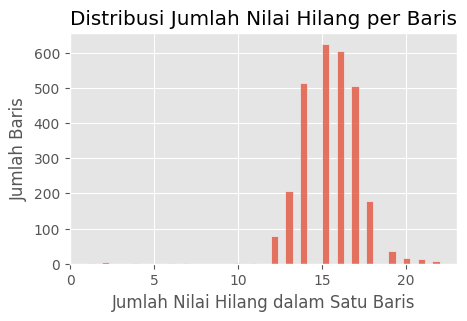


Threshold: Maksimal 14 nilai NaN per baris (sekitar 30% dari total kolom).
Jumlah baris yang memiliki lebih dari 14 nilai NaN: 1983
Jumlah baris ini cukup signifikan, perlu pertimbangan hati-hati sebelum dihapus.


In [8]:
nan_per_row = df.isnull().sum(axis=1)

print("Distribusi Jumlah NaN per Baris:")
print(nan_per_row.value_counts().sort_index())

plt.figure(figsize=(5, 3))
sns.histplot(nan_per_row, bins=df.shape[1], kde=False) # df.shape[1] adalah jumlah total kolom
plt.title('Distribusi Jumlah Nilai Hilang per Baris')
plt.xlabel('Jumlah Nilai Hilang dalam Satu Baris')
plt.ylabel('Jumlah Baris')
plt.show()

# Tentukan threshold, misalnya jika lebih dari 30% kolom dalam satu baris kosong
threshold_percentage = 30
max_allowed_nan_per_row = int((threshold_percentage / 100) * df.shape[1])
print(f"\nThreshold: Maksimal {max_allowed_nan_per_row} nilai NaN per baris (sekitar {threshold_percentage}% dari total kolom).")

rows_to_potentially_drop = df[nan_per_row > max_allowed_nan_per_row]
print(f"Jumlah baris yang memiliki lebih dari {max_allowed_nan_per_row} nilai NaN: {len(rows_to_potentially_drop)}")
if len(rows_to_potentially_drop) < (0.05 * len(df)):
    print("Jumlah baris ini relatif kecil, mungkin bisa dipertimbangkan untuk dihapus.")
else:
    print("Jumlah baris ini cukup signifikan, perlu pertimbangan hati-hati sebelum dihapus.")

Menghapus semua baris yang kita kategorikan memiliki banyak nilai hilang akan menghilangkan sebagian besar data kita, yang tentunya tidak ideal. 

Berikutnya kita akan menghitung persentase nilai yang hilang untuk setiap kolom. Ini akan memberi kita gambaran yang lebih jelas tentang kolom mana yang paling banyak terpengaruh.

In [9]:
# Menghitung dan menampilkan persentase nilai yang hilang untuk setiap kolom
print("Persentase Nilai Hilang per Kolom (Sebelum Penanganan):")
missing_percentage = (df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)
print(missing_percentage) 

Persentase Nilai Hilang per Kolom (Sebelum Penanganan):
All Fatalities                          99.713775
Operator Employee Fatalities            99.713775
Operator Contractor Fatalities          99.713775
Emergency Responder Fatalities          99.713775
Other Fatalities                        99.713775
Public Fatalities                       99.713775
Emergency Responder Injuries            99.570662
Operator Employee Injuries              99.570662
Other Injuries                          99.570662
Public Injuries                         99.570662
All Injuries                            99.570662
Operator Contractor Injuries            99.570662
Liquid Name                             92.057245
Intentional Release (Barrels)           56.744186
Restart Date/Time                       52.021467
Liquid Subtype                          51.735242
Shutdown Date/Time                      50.268336
Public Evacuations                      16.350626
Accident City                           11.2

Analisis Nilai Hilang : 
1. Kolom dengan >90% Nilai Hilang: Hampir semua kolom yang memiliki nilai hilang >90% yaitu kolom Cidera dan Fatalitas. Asumsi yang paling logis adalah bahwa NaN berarti tidak ada kejadian cedera/fatalitas (nilai 0). Jika ada satu saja kejadian, kemungkinan besar akan dicatat. Jadi, mengisi dengan 0 adalah pendekatan yang paling masuk akal dan tidak akan terlalu membiasakan data, malah membuatnya lebih akurat. Sedangkan untuk kolom "Liquid Name" dapat kita isi dengan "UNKNOWN".

2. Kolom dengan >50% Nilai Hilang: "Intentional Release (Barrels)" mirip dengan kolom cedera, NaN di sini kemungkinan besar berarti tidak ada pelepasan yang disengaja (nilai 0). "Restart Date/Time" dan "Shutdown Date/Time" bernilai NaN berarti insiden tersebut tidak menyebabkan shutdown atau data tidak dicatat. Membiarkannya sebagai NaT adalah pilihan yang baik. Untuk "Liquid Subtype" dapat diisi dengan "UNKNOWN" adalah strategi yang baik agar kita tidak kehilangan separuh data baris jika kita menghapus baris dengan NaN di kolom ini.

3. Kolom dengan Persentase Hilang Lebih Kecil (0-20%): Untuk kolom kategorikal seperti "Accident City", "Pipeline Shutdown", "Pipeline/Facility Name", "Accident County", "Pipeline Type", dan "Accident State" dapat diisi dengan "UNKNOWN" merupakan pendekatan yang aman. Ini mempertahankan baris data sambil menandai bahwa informasi spesifik tidak tersedia. Sedangkan Untuk kolom numerik seperti "Public Evacuations" dan kolom biaya ("Other Costs", "Property Damage Costs", dll.) yang persentase hilangnya kecil, mengisi dengan 0 merupakan pilihan yang baik. 

In [10]:
# 1. Kolom Cedera dan Fatalitas -> isi NaN dengan 0
injury_fatality_cols = [
    'Operator Employee Injuries', 'Operator Contractor Injuries',
    'Emergency Responder Injuries', 'Other Injuries', 'Public Injuries', 'All Injuries',
    'Operator Employee Fatalities', 'Operator Contractor Fatalities',
    'Emergency Responder Fatalities', 'Other Fatalities', 'Public Fatalities', 'All Fatalities'
]
for col in injury_fatality_cols:
    if col in df.columns:
        df[col].fillna(0, inplace=True)

# 2. Liquid Name -> isi NaN dengan "UNKNOWN"
if 'Liquid Name' in df.columns:
    df['Liquid Name'].fillna('UNKNOWN', inplace=True)

# 3. Intentional Release (Barrels) -> isi NaN dengan 0
if 'Intentional Release (Barrels)' in df.columns:
    df['Intentional Release (Barrels)'].fillna(0, inplace=True)

# 4. Liquid Subtype -> isi NaN dengan "UNKNOWN"
if 'Liquid Subtype' in df.columns:
    df['Liquid Subtype'].fillna('UNKNOWN', inplace=True)

# 5. Kolom Deskriptif Kategorikal Lainnya
categorical_cols_to_fill_unknown = {
    'Pipeline/Facility Name': 'UNKNOWN',
    'Accident City': 'UNKNOWN',
    'Accident County': 'UNKNOWN',
    'Accident State': 'UNKNOWN',
    'Pipeline Type': 'UNKNOWN',
    'Pipeline Shutdown': 'UNKNOWN'
}
for col, fill_value in categorical_cols_to_fill_unknown.items():
    if col in df.columns:
        df[col].fillna(fill_value, inplace=True)

# 6. Public Evacuations -> isi NaN dengan 0
if 'Public Evacuations' in df.columns:
    df['Public Evacuations'].fillna(0, inplace=True)

# 7. Kolom Biaya -> isi NaN dengan 0
cost_cols = [
    'Property Damage Costs', 'Lost Commodity Costs',
    'Public/Private Property Damage Costs', 'Emergency Response Costs',
    'Environmental Remediation Costs', 'Other Costs'
]
for col in cost_cols:
    if col in df.columns:
        df[col].fillna(0, inplace=True) 

In [11]:
print("\nJumlah Nilai Hilang per Kolom (Setelah Penanganan):")
remaining_missing_counts = df.isnull().sum().sort_values(ascending=False)
print(remaining_missing_counts[remaining_missing_counts > 0])
if remaining_missing_counts[remaining_missing_counts > 0].empty:
    print("Tidak ada lagi nilai hilang (selain NaT pada kolom tanggal yang mungkin ada).")
else:
    print("Kolom yang masih memiliki nilai hilang (kemungkinan NaT pada kolom tanggal):")
    print(remaining_missing_counts[remaining_missing_counts > 0])
print("\n" + "="*70 + "\n")

print("Informasi DataFrame (Setelah Penanganan NaN):")
df.info()


Jumlah Nilai Hilang per Kolom (Setelah Penanganan):
Restart Date/Time     1454
Shutdown Date/Time    1405
dtype: int64
Kolom yang masih memiliki nilai hilang (kemungkinan NaT pada kolom tanggal):
Restart Date/Time     1454
Shutdown Date/Time    1405
dtype: int64


Informasi DataFrame (Setelah Penanganan NaN):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Report Number                         2795 non-null   int64         
 1   Supplemental Number                   2795 non-null   int64         
 2   Accident Year                         2795 non-null   int64         
 3   Accident Date/Time                    2795 non-null   datetime64[ns]
 4   Operator ID                           2795 non-null   int64         
 5   Operator Name                         2795 non-null   obje

##### 1.4: Rekayasa Fitur (Feature Engineering)

Rekayasa fitur adalah proses menggunakan pengetahuan domain untuk membuat fitur baru dari data mentah yang ada, dengan tujuan meningkatkan performa model machine learning atau untuk mempermudah analisis.

Beberapa jenis fitur baru yang dapat dibuat :
1. Fitur Berbasis Waktu: Dari kolom Accident Date/Time, mengekstrak tahun, bulan, hari dalam seminggu, dan jam. Ini akan memungkinkan untuk menganalisis pola temporal kecelakaan.
2. Fitur Durasi: Menghitung durasi pipa tidak beroperasi (Shutdown_Duration_Hours) jika data tanggal shutdown dan restart tersedia dan valid.
3. Fitur Rasio dan Proporsi: Seperti rasio pemulihan cairan (Recovery_Rate) dan biaya per barel yang hilang (Cost_per_Barrel_Lost) untuk memahami efektivitas dan dampak relatif.
4. Fitur Kategorikal dari Numerik (Binning): Mengubah fitur numerik kontinu seperti Net Loss (Barrels) menjadi kategori (Net_Loss_Category) untuk analisis perbandingan.
5. Fitur Indikator/Boolean: Membuat penanda biner, misalnya untuk insiden yang melibatkan cairan berbahaya tinggi (Is_HVL).
6. Fitur Agregat Berbasis Operator: Menghitung statistik historis untuk setiap operator, seperti jumlah insiden sebelumnya dan rata-rata kerugian. Ini memerlukan pengurutan data berdasarkan operator dan tanggal.

In [12]:
# --- 1. FITUR BERBASIS WAKTU ---
if 'Accident Date/Time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Accident Date/Time']):
    df['Accident_Year'] = df['Accident Date/Time'].dt.year
    df['Accident_Month'] = df['Accident Date/Time'].dt.month
    df['Accident_Month_Name'] = df['Accident Date/Time'].dt.month_name()
    df['Accident_DayOfWeek_Num'] = df['Accident Date/Time'].dt.dayofweek # Senin=0, Minggu=6
    df['Accident_DayOfWeek_Name'] = df['Accident Date/Time'].dt.day_name()
    df['Accident_Hour'] = df['Accident Date/Time'].dt.hour

# --- 2. FITUR DURASI SHUTDOWN ---
if 'Shutdown Date/Time' in df.columns and 'Restart Date/Time' in df.columns and \
    pd.api.types.is_datetime64_any_dtype(df['Shutdown Date/Time']) and \
    pd.api.types.is_datetime64_any_dtype(df['Restart Date/Time']):
    df['Shutdown_Duration_Hours'] = (df['Restart Date/Time'] - df['Shutdown Date/Time']).dt.total_seconds() / 3600
    df.loc[df['Shutdown_Duration_Hours'] < 0, 'Shutdown_Duration_Hours'] = -1 
    df['Shutdown_Duration_Hours'].fillna(-1, inplace=True)
else:
    if 'Shutdown_Duration_Hours' not in df.columns:
        df['Shutdown_Duration_Hours'] = -1


# --- 3. FITUR RASIO PEMULIHAN ---
if 'Liquid Recovery (Barrels)' in df.columns and 'Unintentional Release (Barrels)' in df.columns:
    df['Recovery_Rate'] = df['Liquid Recovery (Barrels)'] / (df['Unintentional Release (Barrels)'].replace(0, np.nan))
    df['Recovery_Rate'].fillna(0, inplace=True) 
    df['Recovery_Rate'] = df['Recovery_Rate'].apply(lambda x: min(x, 1.0) if pd.notnull(x) and x >= 0 else 0)
else:
    if 'Recovery_Rate' not in df.columns:
        df['Recovery_Rate'] = 0

# --- 4. FITUR BIAYA PER BAREL HILANG ---
if 'All Costs' in df.columns and 'Net Loss (Barrels)' in df.columns:
    df['Cost_per_Barrel_Lost'] = df['All Costs'] / (df['Net Loss (Barrels)'].replace(0, np.nan))
    df['Cost_per_Barrel_Lost'].fillna(0, inplace=True)
else:
    if 'Cost_per_Barrel_Lost' not in df.columns:
        df['Cost_per_Barrel_Lost'] = 0
    
# --- 5. FITUR KATEGORI UKURAN TUMPAHAN (BINNING) ---
if 'Net Loss (Barrels)' in df.columns:
    positive_loss = df['Net Loss (Barrels)'][df['Net Loss (Barrels)'] > 0]
    if not positive_loss.empty and len(positive_loss) > 3 :
        quantiles = positive_loss.quantile([0.25, 0.5, 0.75]).tolist()
        if len(set(quantiles)) == 3:
            bins = [-np.inf, 0, quantiles[0], quantiles[1], quantiles[2], np.inf]
            labels = ['No Loss', 'Small', 'Medium', 'Large', 'Very Large']
            df['Net_Loss_Category'] = pd.cut(df['Net Loss (Barrels)'], bins=bins, labels=labels, right=True, include_lowest=True)
        else: 
            df['Net_Loss_Category'] = pd.qcut(df['Net Loss (Barrels)'][df['Net Loss (Barrels)'] > 0], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'], duplicates='drop')
            df['Net_Loss_Category'] = df['Net_Loss_Category'].cat.add_categories('No Loss').fillna('No Loss')
    else:
        df['Net_Loss_Category'] = 'No Loss'
else:
    if 'Net_Loss_Category' not in df.columns:
        df['Net_Loss_Category'] = 'UNKNOWN' 

# --- 6. FITUR INDIKATOR CAIRAN BERBAHAYA TINGGI (HVL) ---
if 'Liquid Type' in df.columns:
    df['Is_HVL'] = df['Liquid Type'].str.contains('HVL', case=False, na=False).astype(int)
else:
    if 'Is_HVL' not in df.columns:
        df['Is_HVL'] = 0 

# --- 7. FITUR AGREGAT BERBASIS OPERATOR ---
if 'Operator Name' in df.columns and 'Accident Date/Time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Accident Date/Time']):
    df.sort_values(by=['Operator Name', 'Accident Date/Time'], inplace=True)

    # Jumlah insiden sebelumnya per operator
    df['Previous_Incidents_Operator'] = df.groupby('Operator Name').cumcount()
    
    # Rata-rata Net Loss (Barrels) per operator (menggunakan transform untuk broadcast hasil ke semua baris operator)
    if 'Net Loss (Barrels)' in df.columns:
        df['Avg_NetLoss_Operator'] = df.groupby('Operator Name')['Net Loss (Barrels)'].transform('mean')
    else:
        if 'Avg_NetLoss_Operator' not in df.columns: df['Avg_NetLoss_Operator'] = 0

    # Rata-rata All Costs per operator
    if 'All Costs' in df.columns:
        df['Avg_AllCosts_Operator'] = df.groupby('Operator Name')['All Costs'].transform('mean')
    else:
        if 'Avg_AllCosts_Operator' not in df.columns: df['Avg_AllCosts_Operator'] = 0
        
else:
    if 'Previous_Incidents_Operator' not in df.columns: df['Previous_Incidents_Operator'] = 0
    if 'Avg_NetLoss_Operator' not in df.columns: df['Avg_NetLoss_Operator'] = 0
    if 'Avg_AllCosts_Operator' not in df.columns: df['Avg_AllCosts_Operator'] = 0

# Menampilkan 5 baris teratas dari kolom-kolom baru yang dibuat
print("\nLima Baris Pertama dengan Fitur Baru yang Relevan:")
new_feature_columns = ['Accident_Year', 'Accident_Month_Name', 'Accident_DayOfWeek_Name', 'Accident_Hour', 
                       'Shutdown_Duration_Hours', 'Recovery_Rate', 'Cost_per_Barrel_Lost', 
                       'Net_Loss_Category', 'Is_HVL',
                       'Previous_Incidents_Operator', 'Avg_NetLoss_Operator', 'Avg_AllCosts_Operator']
existing_new_features = [col for col in new_feature_columns if col in df.columns]

df[existing_new_features].head()


Lima Baris Pertama dengan Fitur Baru yang Relevan:


,Accident_Year,Accident_Month_Name,Accident_DayOfWeek_Name,Accident_Hour,Shutdown_Duration_Hours,Recovery_Rate,Cost_per_Barrel_Lost,Net_Loss_Category,Is_HVL,Previous_Incidents_Operator,Avg_NetLoss_Operator,Avg_AllCosts_Operator
133,2010,May,Tuesday,11,77.666667,0.566279,25860.589812,Very Large,0,0,139.875,6104564.875
235,2010,September,Tuesday,14,-1.000000,1.000000,0.000000,No Loss,0,1,139.875,6104564.875
357,2011,January,Saturday,8,217.466667,1.000000,0.000000,No Loss,0,2,139.875,6104564.875
705,2012,January,Saturday,22,-1.000000,1.000000,0.000000,No Loss,0,3,139.875,6104564.875
1274,2013,June,Wednesday,16,-1.000000,1.000000,0.000000,No Loss,0,4,139.875,6104564.875


#### Tahap 2: Analisis Data Eksploratif (EDA)

Setelah membersihkan dan mempersiapkan data kita, termasuk membuat fitur-fitur baru yang relevan, saatnya untuk melakukan Analisis Data Eksploratif (EDA). Tujuan dari EDA adalah untuk memahami karakteristik utama dari data, menemukan pola, mengidentifikasi anomali, menguji hipotesis awal, dan mendapatkan wawasan melalui ringkasan statistik dan representasi visual.

Kita akan memulai dengan menganalisis faktor-faktor penyebab kecelakaan, kemudian melihat tren temporal, distribusi geografis, dan dampak dari insiden-insiden ini.

##### 2.1: Analisis Distribusi Penyebab Kecelakaan
Salah satu pertanyaan paling mendasar yang ingin kita jawab adalah: "Apa penyebab utama kecelakaan pipa?" Untuk mengetahuinya, kita akan menganalisis distribusi dari kolom Cause Category dan Cause Subcategory. Kita akan menghitung frekuensi kemunculan setiap kategori penyebab dan memvisualisasikannya untuk mendapatkan gambaran yang jelas.

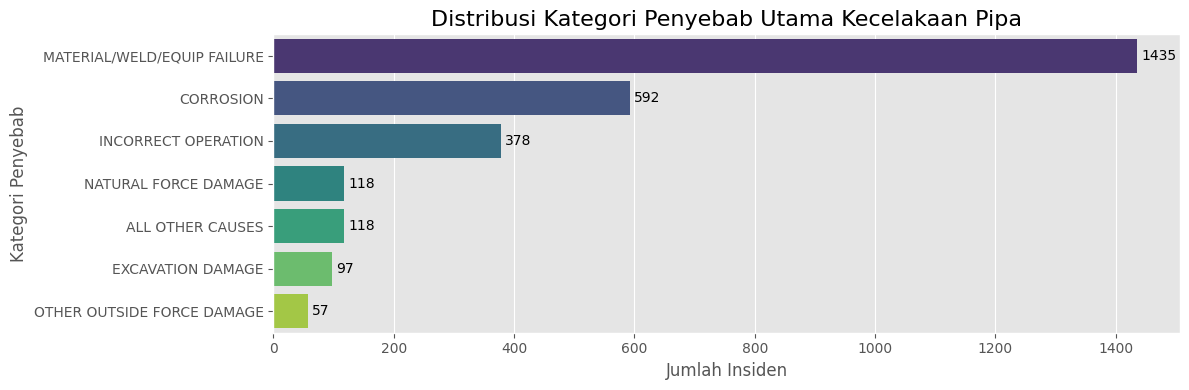

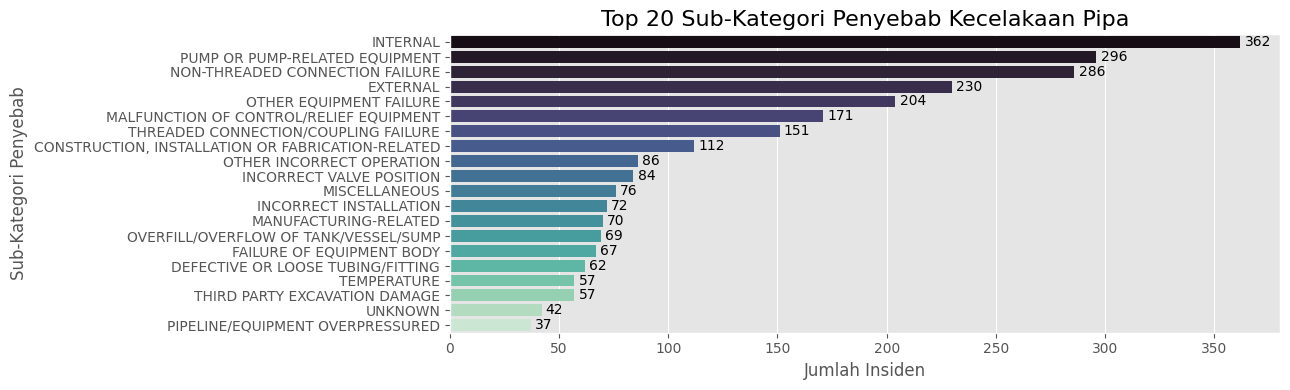

In [13]:
# --- Analisis Frekuensi Cause Category ---
if 'Cause Category' in df.columns:
    cause_category_counts = df['Cause Category'].value_counts()
    # Visualisasi Cause Category sebagai grafik batang horizontal dengan nilai pada bar
    plt.figure(figsize=(12, 4)) 
    ax_cat = sns.barplot(x=cause_category_counts.values, y=cause_category_counts.index, 
                         hue=cause_category_counts.index, palette="viridis", legend=False, orient='h')
    plt.title('Distribusi Kategori Penyebab Utama Kecelakaan Pipa', fontsize=16)
    plt.xlabel('Jumlah Insiden', fontsize=12) 
    plt.ylabel('Kategori Penyebab', fontsize=12) 
    for i in ax_cat.containers:
        ax_cat.bar_label(i, label_type='edge', fontsize=10, padding=3)
    plt.tight_layout() 
    plt.show()
else:
    print("Kolom 'Cause Category' tidak ditemukan.")

# --- Analisis Frekuensi Cause Subcategory (Top N) ---
if 'Cause Subcategory' in df.columns:
    cause_subcategory_counts = df['Cause Subcategory'].value_counts()

    top_n_subcategory = cause_subcategory_counts.head(20)
    plt.figure(figsize=(13, 4))
    ax_subcat = sns.barplot(x=top_n_subcategory.values, y=top_n_subcategory.index, 
                            hue=top_n_subcategory.index, palette="mako", legend=False, orient='h')
    plt.title('Top 20 Sub-Kategori Penyebab Kecelakaan Pipa', fontsize=16)
    plt.xlabel('Jumlah Insiden', fontsize=12)
    plt.ylabel('Sub-Kategori Penyebab', fontsize=12)
    for i in ax_subcat.containers:
        ax_subcat.bar_label(i, label_type='edge', fontsize=10, padding=3)
        
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Cause Subcategory' tidak ditemukan.")

**Kategori Penyebab Utama (Cause Category)**
1. MATERIAL/WELD/EQUIP FAILURE 
   Kategori paling dominan sebagai penyebab utama kecelakaan. Mengindikasikan bahwa masalah integritas fisik pipa, las, dan peralatan merupakan kontributor terbesar.

2. CORROSION (Korosi  
   Menjadi penyebab utama kedua. Menyoroti pentingnya program inspeksi korosi internal dan eksternal serta pencegahan dini.

3. INCORRECT OPERATION (Kesalahan Operasional  
   Menunjukkan perlunya perbaikan dalam prosedur operasional dan pelatihan personel.

4. Kategori Lainnya  
   NATURAL FORCE DAMAGE, EXCAVATION DAMAGE, OTHER OUTSIDE FORCE DAMAGE, dan ALL OTHER CAUSES memiliki frekuensi lebih rendah. Meski demikian, tetap relevan untuk dimonitor karena memiliki potensi risiko dalam kondisi tertentu.

**Sub-Kategori Penyebab Teratas (Top 20 Cause Subcategory)**
1. INTERNAL  
   Kemungkinan besar merujuk pada korosi internal. Menguatkan kesimpulan bahwa korosi adalah isu serius dalam keamanan pipa.

2. PUMP OR PUMP-RELATED EQUIPMENT 
   Berkaitan langsung dengan kerusakan atau malfungsi peralatan.

3. NON-THREADED CONNECTION FAILURE
   Merupakan bentuk kegagalan sambungan yang signifikan.

4. EXTERNAL  
   Kemungkinan besar menunjukkan korosi eksternal. Menekankan bahwa ancaman berasal dari dalam dan luar pipa.

**Ringkasan Kesimpulan**
Secara keseluruhan, masalah terkait material, pengelasan, peralatan, dan korosi (baik internal maupun eksternal) tampaknya menjadi pendorong utama kecelakaan pipa, dengan jumlah insiden yang terkuantifikasi jelas pada visualisasi. Kesalahan operasional juga memainkan peran yang cukup besar. Wawasan ini dapat menjadi dasar untuk rekomendasi tindakan preventif, seperti peningkatan inspeksi material dan las, program manajemen korosi yang lebih ketat, serta evaluasi dan perbaikan prosedur operasional.


##### 2.2: Analisis Tren Kecelakaan Berdasarkan Waktu

Memahami kapan kecelakaan lebih sering terjadi dapat memberikan petunjuk penting. Apakah ada peningkatan atau penurunan jumlah insiden dari tahun ke tahun? Apakah ada bulan-bulan tertentu atau hari-hari dalam seminggu yang lebih rawan? Bagaimana dengan jam-jam tertentu dalam sehari? Dengan menganalisis tren temporal, kita dapat mengidentifikasi periode risiko tinggi yang mungkin memerlukan perhatian lebih.


============================== Analisis Insiden per Tahun ==============================


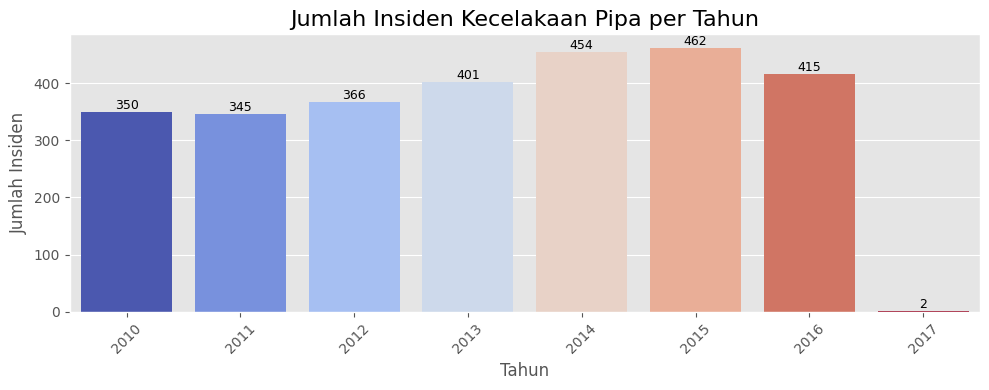


============================== Analisis Insiden per Bulan ==============================


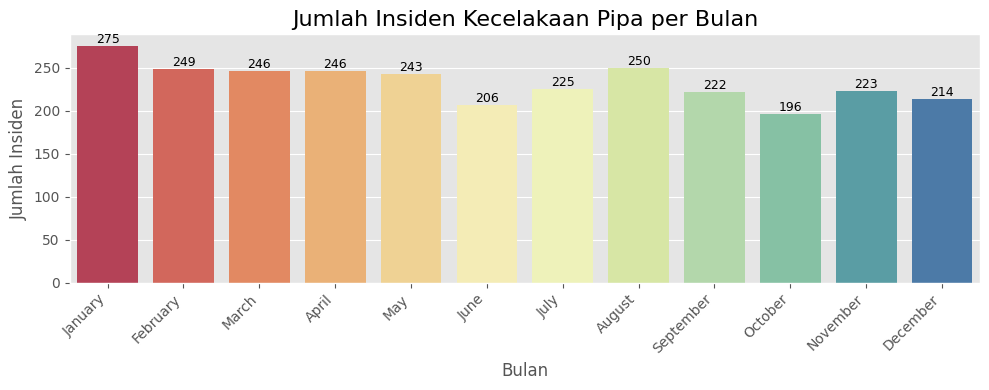


============================== Analisis Insiden per Hari dalam Seminggu ==============================


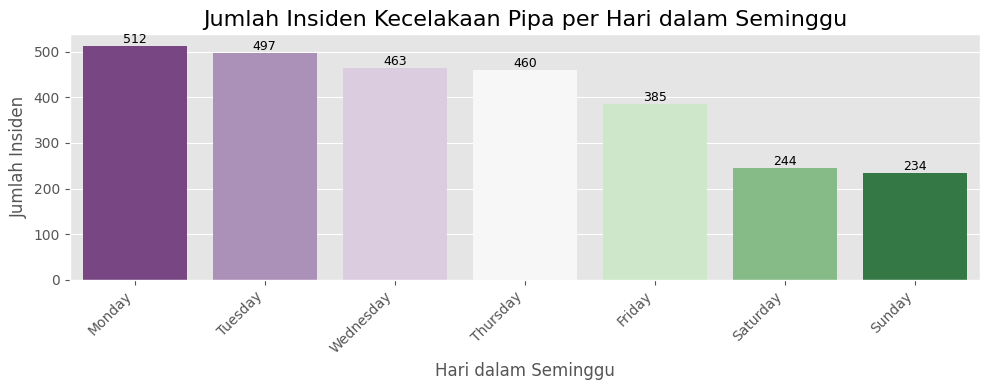


============================== Analisis Insiden per Jam ==============================


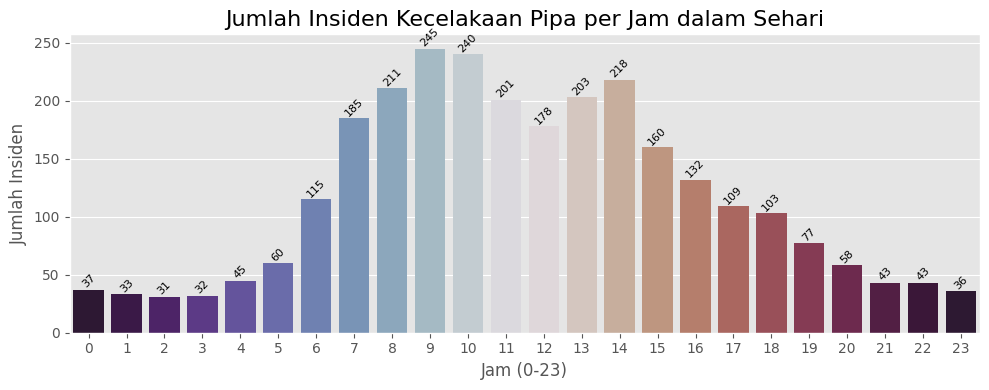

In [14]:
# --- Analisis Jumlah Insiden per Tahun ---
if 'Accident_Year' in df.columns:
    print("\n" + "="*30 + " Analisis Insiden per Tahun " + "="*30)
    accidents_per_year = df['Accident_Year'].value_counts().sort_index()
    plt.figure(figsize=(10, 4))
    ax_year = sns.barplot(x=accidents_per_year.index, y=accidents_per_year.values,
                          hue=accidents_per_year.index, palette="coolwarm", legend=False)
    plt.title('Jumlah Insiden Kecelakaan Pipa per Tahun', fontsize=16)
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Jumlah Insiden', fontsize=12)
    plt.xticks(rotation=45)
    for i in ax_year.containers:
        ax_year.bar_label(i, label_type='edge', fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Accident_Year' tidak ditemukan.")

# --- Analisis Jumlah Insiden per Bulan ---
if 'Accident_Month_Name' in df.columns:
    print("\n" + "="*30 + " Analisis Insiden per Bulan " + "="*30)
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    accidents_per_month = df['Accident_Month_Name'].value_counts().reindex(month_order)
    plt.figure(figsize=(10, 4))
    ax_month = sns.barplot(x=accidents_per_month.index, y=accidents_per_month.values,
                           hue=accidents_per_month.index, palette="Spectral", legend=False)
    plt.title('Jumlah Insiden Kecelakaan Pipa per Bulan', fontsize=16)
    plt.xlabel('Bulan', fontsize=12)
    plt.ylabel('Jumlah Insiden', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    for i in ax_month.containers:
        ax_month.bar_label(i, label_type='edge', fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Accident_Month_Name' tidak ditemukan.")

# --- Analisis Jumlah Insiden per Hari dalam Seminggu ---
if 'Accident_DayOfWeek_Name' in df.columns:
    print("\n" + "="*30 + " Analisis Insiden per Hari dalam Seminggu " + "="*30)
    # Urutkan hari dengan benar
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    accidents_per_dayofweek = df['Accident_DayOfWeek_Name'].value_counts().reindex(day_order)
    plt.figure(figsize=(10, 4))
    ax_day = sns.barplot(x=accidents_per_dayofweek.index, y=accidents_per_dayofweek.values,
                         hue=accidents_per_dayofweek.index, palette="PRGn", legend=False)
    plt.title('Jumlah Insiden Kecelakaan Pipa per Hari dalam Seminggu', fontsize=16)
    plt.xlabel('Hari dalam Seminggu', fontsize=12)
    plt.ylabel('Jumlah Insiden', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    for i in ax_day.containers:
        ax_day.bar_label(i, label_type='edge', fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Accident_DayOfWeek_Name' tidak ditemukan.")

# --- Analisis Jumlah Insiden per Jam ---
if 'Accident_Hour' in df.columns:
    print("\n" + "="*30 + " Analisis Insiden per Jam " + "="*30)
    accidents_per_hour = df['Accident_Hour'].value_counts().sort_index()
    plt.figure(figsize=(10, 4))
    ax_hour = sns.barplot(x=accidents_per_hour.index, y=accidents_per_hour.values,
                          hue=accidents_per_hour.index, palette="twilight_shifted", legend=False)
    plt.title('Jumlah Insiden Kecelakaan Pipa per Jam dalam Sehari', fontsize=16)
    plt.xlabel('Jam (0-23)', fontsize=12)
    plt.ylabel('Jumlah Insiden', fontsize=12)
    for i in ax_hour.containers:
        ax_hour.bar_label(i, label_type='edge', fontsize=8, rotation=45) 
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Accident_Hour' tidak ditemukan.")


**Analisis tren waktu kecelakaan pipa menunjukkan beberapa pola:**

- Tahunan: Jumlah insiden berfluktuasi, dengan puncak terjadi sekitar tahun 2015-2016. Data tahun 2017 tampak minim, kemungkinan karena periode pengumpulan data yang belum selesai.

- Bulanan: Insiden tertinggi terjadi pada bulan Januari, dengan frekuensi yang juga cukup tinggi di bulan-bulan awal tahun lainnya dan Agustus. Bulan Juni dan Oktober menunjukkan angka yang relatif lebih rendah.

- Harian: Kecelakaan lebih sering terjadi pada hari kerja, khususnya Senin dan Selasa, dan cenderung menurun pada akhir pekan.

- Per Jam: Puncak insiden terjadi pada jam kerja siang hari, terutama antara pukul 09:00 hingga 14:00.

**Kesimpulan Awal Tren Waktu:**
Secara umum, tidak terlihat adanya tren penurunan insiden yang stabil selama periode 2010-2016. Frekuensi insiden cenderung lebih tinggi pada awal tahun, hari kerja, dan selama jam kerja normal.

##### 2.3: Analisis Geospasial Kecelakaan
Setelah menganalisis kapan kecelakaan terjadi, pertanyaan berikutnya adalah di mana kecelakaan ini paling sering terjadi. Analisis geospasial dapat mengungkapkan konsentrasi insiden di area geografis tertentu, yang mungkin menunjukkan faktor risiko regional atau area yang memerlukan perhatian lebih.

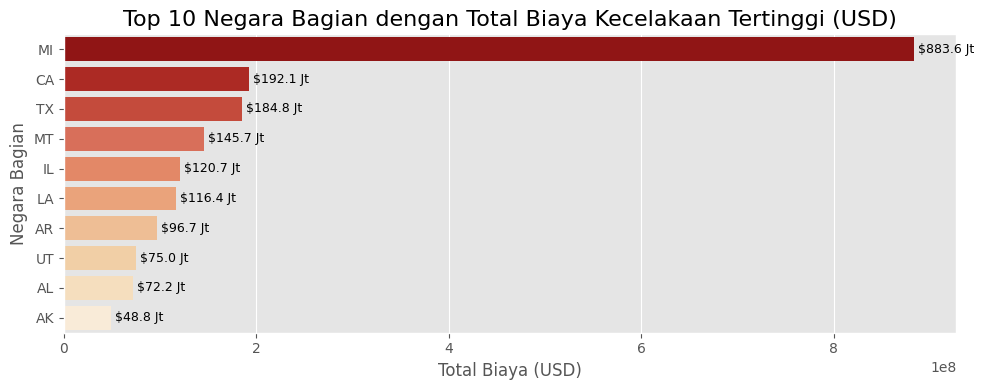

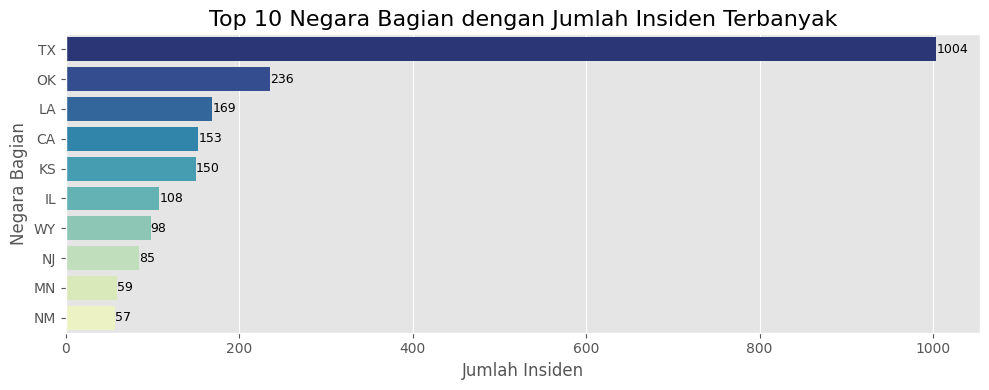

In [15]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'Accident State' in df.columns:
    
    df_geo = df.copy()
    df_geo.dropna(subset=['Accident State'], inplace=True)

    # --- 1. Analisis Geospasial Biaya Kecelakaan ---
    if 'All Costs' in df_geo.columns:
        costs_by_state = df_geo.groupby('Accident State')['All Costs'].sum().reset_index()
        costs_by_state.sort_values(by='All Costs', ascending=False, inplace=True)

        fig_choropleth_costs = px.choropleth(
            costs_by_state,
            locations='Accident State',         
            locationmode='USA-states',          
            color='All Costs',                  
            scope='usa',                        
            color_continuous_scale="Reds",      
            hover_name='Accident State',        
            hover_data={'All Costs': ':,.2f'}, 
            title='Total Biaya Kecelakaan Pipa per Negara Bagian (USD)'
        )
        fig_choropleth_costs.update_layout(
            margin={"r":0,"t":50,"l":0,"b":10},
            geo=dict(bgcolor='rgba(0,0,0,0)') 
        )
        fig_choropleth_costs.show()

        top_n_states_costs = costs_by_state.head(10)
        plt.figure(figsize=(10, 4))
        ax_state_costs = sns.barplot(x=top_n_states_costs['All Costs'], y=top_n_states_costs['Accident State'],
                                   hue=top_n_states_costs['Accident State'], palette="OrRd_r", legend=False, orient='h', dodge=False)
        plt.title('Top 10 Negara Bagian dengan Total Biaya Kecelakaan Tertinggi (USD)', fontsize=16)
        plt.xlabel('Total Biaya (USD)', fontsize=12)
        plt.ylabel('Negara Bagian', fontsize=12)
        
        for container in ax_state_costs.containers:
            labels = [f'${c/1e6:,.1f} Jt' if c >= 1e6 else f'${c:,.0f}' for c in container.datavalues]
            ax_state_costs.bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=3)
                
        plt.tight_layout()
        plt.show()
    else:
        print("Kolom 'All Costs' tidak ditemukan. Analisis geospasial biaya tidak dapat dilakukan.")

    print("\n" + "="*70 + "\n")

    # --- 2. Analisis Geospasial Frekuensi Insiden ---
    incidents_by_state = df_geo['Accident State'].value_counts().reset_index()
    incidents_by_state.columns = ['Accident State', 'Jumlah Insiden']
    incidents_by_state.sort_values(by='Jumlah Insiden', ascending=False, inplace=True)

    fig_choropleth_incidents = px.choropleth(
        incidents_by_state,
        locations='Accident State',         
        locationmode='USA-states',          
        color='Jumlah Insiden',             
        scope='usa',                        
        color_continuous_scale="Blues",
        hover_name='Accident State',        
        hover_data={'Jumlah Insiden': True}, 
        title='Total Jumlah Insiden Kecelakaan Pipa per Negara Bagian'
    )
    fig_choropleth_incidents.update_layout(
        margin={"r":0,"t":50,"l":0,"b":10},
        geo=dict(bgcolor='rgba(0,0,0,0)')
    )
    fig_choropleth_incidents.show()

    top_n_states_incidents = incidents_by_state.head(10)
    plt.figure(figsize=(10, 4))
    ax_state_incidents = sns.barplot(x=top_n_states_incidents['Jumlah Insiden'], y=top_n_states_incidents['Accident State'],
                                   hue=top_n_states_incidents['Accident State'], palette="YlGnBu_r", legend=False, orient='h', dodge=False)
    plt.title('Top 10 Negara Bagian dengan Jumlah Insiden Terbanyak', fontsize=16)
    plt.xlabel('Jumlah Insiden', fontsize=12)
    plt.ylabel('Negara Bagian', fontsize=12)
    
    for i in ax_state_incidents.containers:
        ax_state_incidents.bar_label(i, label_type='edge', fontsize=9)
        
    plt.tight_layout()
    plt.show()
        
else:
    print("Kolom 'Accident State' tidak ditemukan. Analisis geospasial tidak dapat dilakukan.")

Analisis geospasial mengungkap distribusi biaya dan frekuensi insiden yang bervariasi antar negara bagian:
- Dampak Biaya Tertinggi: Michigan (MI) mencatat total biaya kecelakaan tertinggi (sekitar $883,6 Juta), diikuti oleh California (CA) ($192,1 Jt), Texas (TX) ($184,8 Jt), dan Montana (MT) ($145,7 Jt).
- Frekuensi Insiden Tertinggi: Texas (TX) memiliki jumlah insiden terbanyak (1004 insiden), diikuti oleh Oklahoma (OK) (236), Louisiana (LA) (169), California (CA) (153), dan Kansas (KS) (150).

Perbandingan Kunci:
- Texas memimpin dalam jumlah insiden, namun bukan dalam total biaya, menunjukkan potensi biaya per insiden yang lebih rendah dibandingkan negara bagian lain.
- Michigan menonjol dengan biaya tertinggi meskipun frekuensi insidennya tidak termasuk yang teratas, mengindikasikan insiden yang sangat mahal.
- California dan Louisiana muncul di daftar atas untuk kedua metrik (frekuensi dan biaya), menandakan tantangan ganda.

##### 2.4: Analisis Dampak Kecelakaan (Kerugian Barel dan Biaya)

Selain memahami penyebab, kapan, dan di mana kecelakaan terjadi, penting juga untuk menganalisis seberapa besar dampak yang ditimbulkan. Dampak ini dapat diukur dari berbagai sisi, seperti volume cairan yang hilang (Net Loss (Barrels)) dan total biaya yang terkait (All Costs). Kita juga akan melihat distribusi dari komponen-komponen biaya utama untuk memahami aspek mana yang paling membebani secara finansial.

Kita akan menganalisis:
1. Distribusi Net Loss (Barrels).
2. Distribusi All Costs.
3. Hubungan antara Net Loss (Barrels) dan All Costs.
3. Distribusi komponen biaya utama: Property Damage Costs, Lost Commodity Costs, Environmental Remediation Costs, dan Emergency Response Costs.
4. Operator atau jenis penyebab yang terkait dengan kerugian dan biaya tertinggi.


============================== Analisis Net Loss (Barrels) ==============================

Statistik Deskriptif untuk Net Loss (Barrels):
count     2795.000000
mean       132.194050
std       1185.019252
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      30565.000000
Name: Net Loss (Barrels), dtype: float64


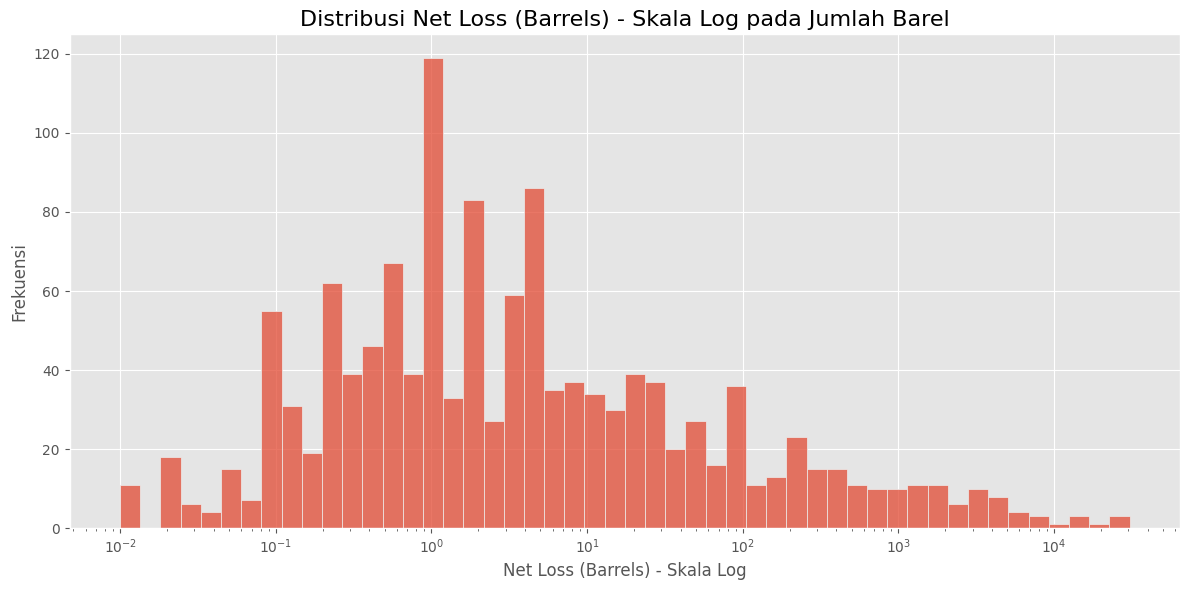

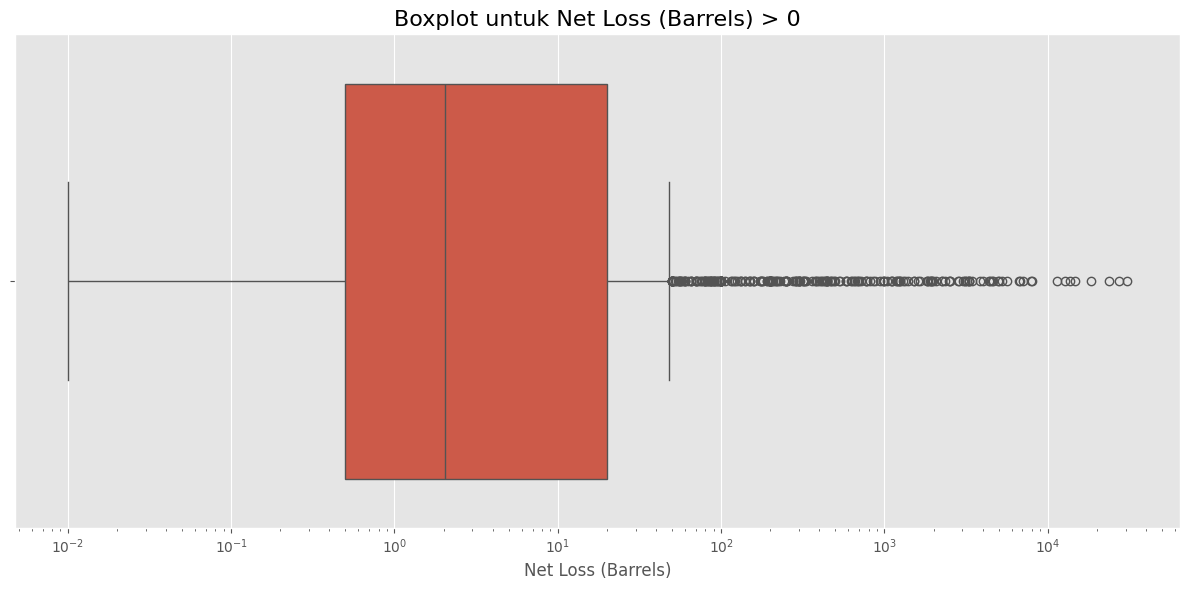


============================== Analisis All Costs ==============================

Statistik Deskriptif untuk All Costs (USD):
count    2.795000e+03
mean     8.340332e+05
std      1.657830e+07
min      0.000000e+00
25%      5.039500e+03
50%      2.312900e+04
75%      1.172325e+05
max      8.405261e+08
Name: All Costs, dtype: float64


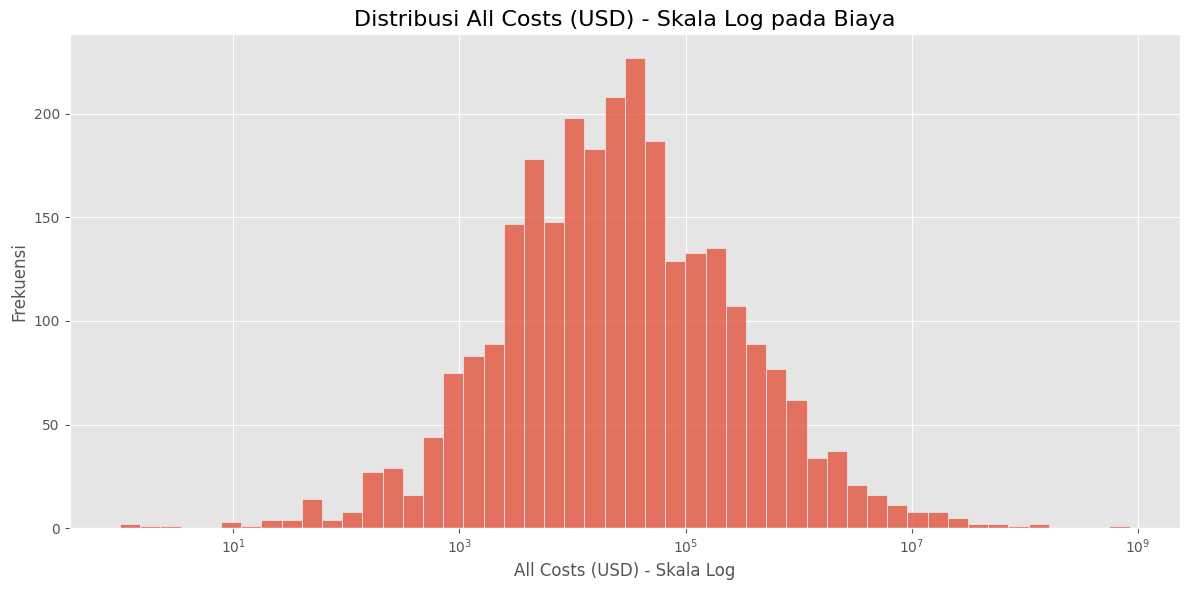

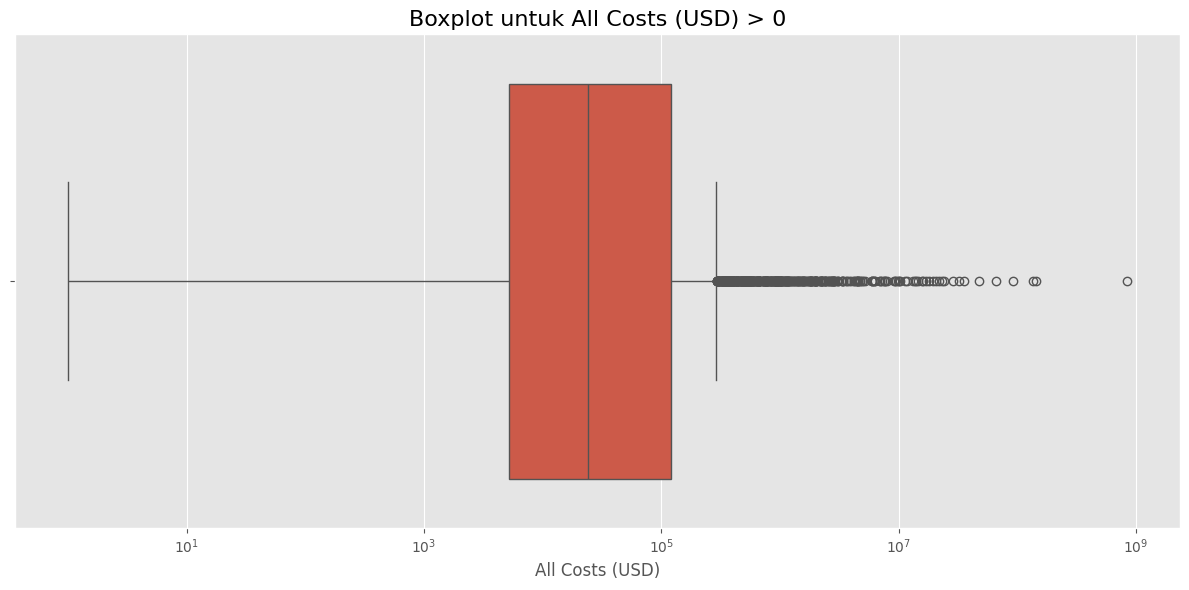


============================== Hubungan Net Loss vs All Costs ==============================


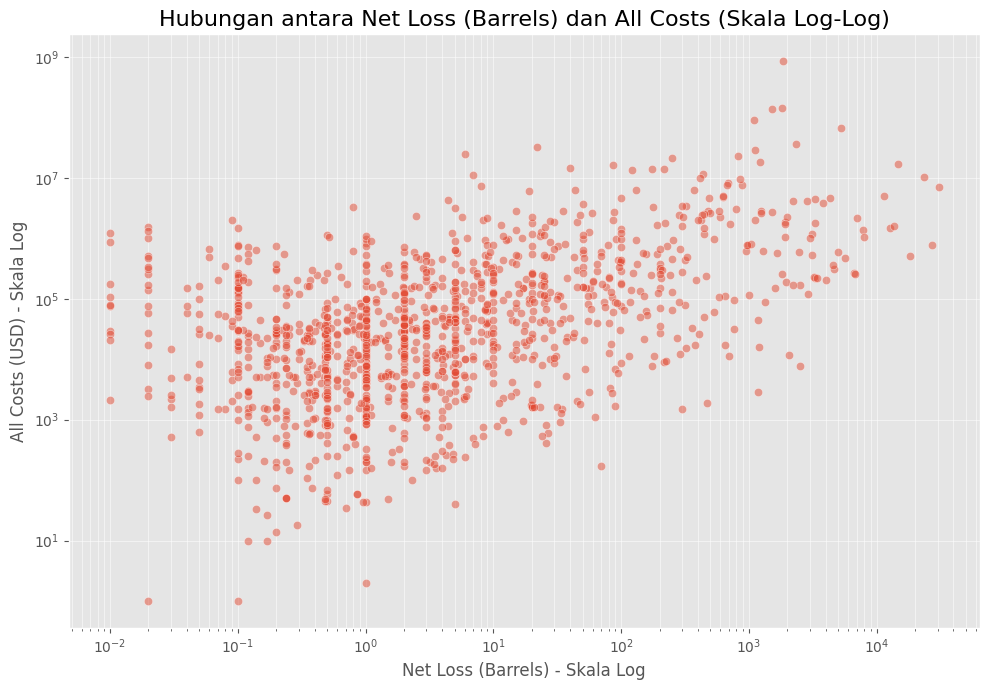


Koefisien Korelasi Pearson antara Net Loss (>0) dan All Costs (>0): 0.06

============================== Analisis Komponen Biaya ==============================


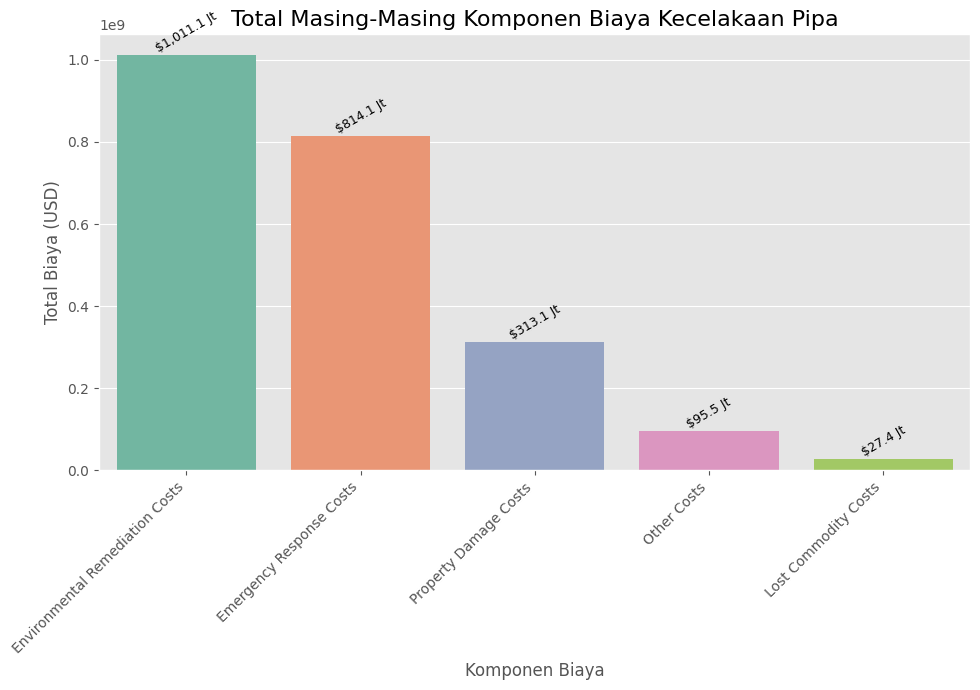


=============== Top 10 Insiden berdasarkan Net Loss (Barrels) ===============
|   Report Number | Accident Date/Time   | Operator Name                               | Accident City                                | Accident State   |   Net Loss (Barrels) |   All Costs | Cause Category              |
|-----------------|----------------------|---------------------------------------------|----------------------------------------------|------------------|----------------------|-------------|-----------------------------|
|        20150071 | 2015-01-26 09:38:00  | ENTERPRISE PRODUCTS OPERATING LLC           | COLLIERS                                     | WV               |                30565 |     6910591 | MATERIAL/WELD/EQUIP FAILURE |
|        20150040 | 2015-01-10 20:45:00  | ENTERPRISE PRODUCTS OPERATING LLC           | UNKNOWN                                      | TX               |                27123 |      782260 | MATERIAL/WELD/EQUIP FAILURE |
|        20130126 | 2013-03-12 17

In [16]:
# --- 1. Analisis Distribusi Net Loss (Barrels) ---
if 'Net Loss (Barrels)' in df.columns:
    print("\n" + "="*30 + " Analisis Net Loss (Barrels) " + "="*30)
    print("\nStatistik Deskriptif untuk Net Loss (Barrels):")
    print(df['Net Loss (Barrels)'].describe())

    plt.figure(figsize=(12, 6))
    sns.histplot(df['Net Loss (Barrels)'][df['Net Loss (Barrels)'] > 0], bins=50, kde=False, log_scale=(True, False)) 
    plt.title('Distribusi Net Loss (Barrels) - Skala Log pada Jumlah Barel', fontsize=16)
    plt.xlabel('Net Loss (Barrels) - Skala Log', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Net Loss (Barrels)'][df['Net Loss (Barrels)'] > 0])
    plt.title('Boxplot untuk Net Loss (Barrels) > 0', fontsize=16)
    plt.xlabel('Net Loss (Barrels)', fontsize=12)
    plt.xscale('log')
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'Net Loss (Barrels)' tidak ditemukan.")

# --- 2. Analisis Distribusi All Costs ---
if 'All Costs' in df.columns:
    print("\n" + "="*30 + " Analisis All Costs " + "="*30)
    print("\nStatistik Deskriptif untuk All Costs (USD):")
    print(df['All Costs'].describe())

    plt.figure(figsize=(12, 6))
    sns.histplot(df['All Costs'][df['All Costs'] > 0], bins=50, kde=False, log_scale=(True, False))
    plt.title('Distribusi All Costs (USD) - Skala Log pada Biaya', fontsize=16)
    plt.xlabel('All Costs (USD) - Skala Log', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['All Costs'][df['All Costs'] > 0])
    plt.title('Boxplot untuk All Costs (USD) > 0', fontsize=16)
    plt.xlabel('All Costs (USD)', fontsize=12)
    plt.xscale('log')
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'All Costs' tidak ditemukan.")

# --- 3. Hubungan antara Net Loss (Barrels) dan All Costs ---
if 'Net Loss (Barrels)' in df.columns and 'All Costs' in df.columns:
    print("\n" + "="*30 + " Hubungan Net Loss vs All Costs " + "="*30)
    df_filtered_scatter = df[(df['Net Loss (Barrels)'] > 0) & (df['All Costs'] > 0)]
    
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df_filtered_scatter, x='Net Loss (Barrels)', y='All Costs', alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Hubungan antara Net Loss (Barrels) dan All Costs (Skala Log-Log)', fontsize=16)
    plt.xlabel('Net Loss (Barrels) - Skala Log', fontsize=12)
    plt.ylabel('All Costs (USD) - Skala Log', fontsize=12)
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.tight_layout()
    plt.show()
    
    # Koefisien korelasi (Pearson)
    if not df_filtered_scatter.empty:
        correlation = df_filtered_scatter['Net Loss (Barrels)'].corr(df_filtered_scatter['All Costs'])
        print(f"\nKoefisien Korelasi Pearson antara Net Loss (>0) dan All Costs (>0): {correlation:.2f}")
else:
    print("Kolom 'Net Loss (Barrels)' atau 'All Costs' tidak ditemukan untuk analisis korelasi.")

# --- 4. Analisis Komponen Biaya Utama ---
cost_component_cols = ['Property Damage Costs', 'Lost Commodity Costs', 
                       'Environmental Remediation Costs', 'Emergency Response Costs', 'Other Costs']
# Filter kolom yang ada di DataFrame
cost_component_cols_exist = [col for col in cost_component_cols if col in df.columns]

if cost_component_cols_exist:
    print("\n" + "="*30 + " Analisis Komponen Biaya " + "="*30)
    total_cost_components = df[cost_component_cols_exist].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 7))
    ax_cost_comp = sns.barplot(x=total_cost_components.index, y=total_cost_components.values,
                               hue=total_cost_components.index, palette="Set2", legend=False)
    plt.title('Total Masing-Masing Komponen Biaya Kecelakaan Pipa', fontsize=16)
    plt.xlabel('Komponen Biaya', fontsize=12)
    plt.ylabel('Total Biaya (USD)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    for i in ax_cost_comp.containers:
        labels = [f'${val/1e6:,.1f} Jt' if val >= 1e6 else f'${val:,.0f}' for val in i.datavalues]
        ax_cost_comp.bar_label(i, labels=labels, label_type='edge', fontsize=9, rotation=30)
        
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom komponen biaya yang ditemukan untuk dianalisis.")

from tabulate import tabulate

# --- 5. Top 10 Insiden dengan Kerugian Barel Terbesar ---
if 'Net Loss (Barrels)' in df.columns:
    print("\n" + "="*15 + " Top 10 Insiden berdasarkan Net Loss (Barrels) " + "="*15)
    top_10_loss_incidents = df.sort_values(by='Net Loss (Barrels)', ascending=False).head(10)
    display_columns = ['Report Number', 'Accident Date/Time', 'Operator Name', 
                       'Accident City', 'Accident State', 'Net Loss (Barrels)', 
                       'All Costs', 'Cause Category']
    print(tabulate(top_10_loss_incidents[display_columns], headers='keys', tablefmt='github', showindex=False))
else:
    print("Kolom 'Net Loss (Barrels)' tidak ditemukan.")


# --- 6. Top 10 Insiden dengan Total Biaya Terbesar ---
if 'All Costs' in df.columns:
    print("\n" + "="*15 + " Top 10 Insiden berdasarkan All Costs " + "="*15)
    top_10_cost_incidents = df.sort_values(by='All Costs', ascending=False).head(10)
    display_columns = ['Report Number', 'Accident Date/Time', 'Operator Name', 
                       'Accident City', 'Accident State', 'Net Loss (Barrels)', 
                       'All Costs', 'Cause Category']
    print(tabulate(top_10_cost_incidents[display_columns], headers='keys', tablefmt='github', showindex=False))
else:
    print("Kolom 'All Costs' tidak ditemukan.")


Analisis dampak kecelakaan mengungkapkan beberapa aspek penting terkait kerugian fisik dan finansial:
1. Distribusi Kerugian Barel (Net Loss (Barrels)): Visualisasi (histogram dan boxplot dengan skala log) menunjukkan bahwa sebagian besar insiden mengakibatkan kerugian barel yang relatif kecil. Namun, terdapat sejumlah kecil insiden dengan kerugian yang sangat besar (outlier), mengindikasikan bahwa meskipun jarang, insiden berdampak masif dapat terjadi.

2. Distribusi Total Biaya (All Costs): Pola serupa terlihat pada distribusi total biaya. Banyak insiden memiliki biaya yang relatif terkendali, tetapi ada insiden-insiden tertentu yang menelan biaya sangat tinggi, juga menunjukkan distribusi yang miring ke kanan. Penggunaan skala log membantu melihat sebaran ini dengan lebih jelas.

3. Hubungan Kerugian Barel dan Total Biaya: Scatter plot (dengan skala log-log) umumnya menunjukkan adanya korelasi positif antara Net Loss (Barrels) dan All Costs; semakin besar tumpahan, cenderung semakin tinggi biayanya. Namun, sebaran titik juga mengindikasikan bahwa hubungan ini tidak selalu linear sempurna; beberapa tumpahan kecil bisa berbiaya mahal, dan sebaliknya, yang mungkin dipengaruhi oleh faktor lain seperti jenis cairan, lokasi, dan biaya remediasi.

4. Komponen Biaya Utama: Dari grafik batang komponen biaya, Environmental Remediation Costs (Biaya Remediasi Lingkungan) dan Property Damage Costs (Biaya Kerusakan Properti) tampak sebagai kontributor terbesar terhadap total biaya keseluruhan, seringkali melebihi komponen lain seperti Lost Commodity Costs (Biaya Komoditas yang Hilang) atau Emergency Response Costs (Biaya Tanggap Darurat). Ini menyoroti beban signifikan dari pemulihan lingkungan dan kerusakan properti akibat insiden pipa.

5. Insiden dengan Dampak Terbesar: Dengan melihat daftar 10 insiden teratas berdasarkan kerugian barel dan total biaya, kita dapat mengidentifikasi insiden-insiden spesifik yang paling merugikan. Penting untuk dicatat apakah insiden yang sama mendominasi kedua daftar tersebut, atau apakah ada perbedaan signifikan, yang dapat memberikan petunjuk tentang jenis insiden mana yang paling mahal atau paling merusak lingkungan.

Kesimpulan dari analisis dampak ini adalah bahwa meskipun mayoritas insiden mungkin berskala kecil hingga sedang, dampak kumulatif dan insiden-insiden besar tunggal dapat sangat signifikan baik dari segi volume tumpahan maupun biaya. Fokus pada pencegahan, terutama untuk penyebab yang berpotensi menimbulkan kerugian dan biaya tinggi, menjadi sangat krusial.

##### 2.5: Analisis Jenis Cairan yang Terlibat
Jenis cairan yang diangkut oleh pipa tentu memiliki peran signifikan dalam risiko dan dampak kecelakaan. Cairan yang berbeda memiliki sifat fisik dan kimia yang berbeda, yang dapat mempengaruhi kemungkinan kebocoran, tingkat bahaya, dan kesulitan penanganan tumpahan. Pada langkah ini, kita akan menganalisis:
1. Jenis cairan (Liquid Type) dan sub-jenis cairan (Liquid Subtype) yang paling sering terlibat dalam insiden.
2. Apakah ada jenis cairan tertentu yang cenderung mengakibatkan kerugian barel (Net Loss (Barrels)) atau total biaya (All Costs) yang lebih tinggi.
3. Apakah ada hubungan antara jenis cairan dan kategori penyebab utama (Cause Category).

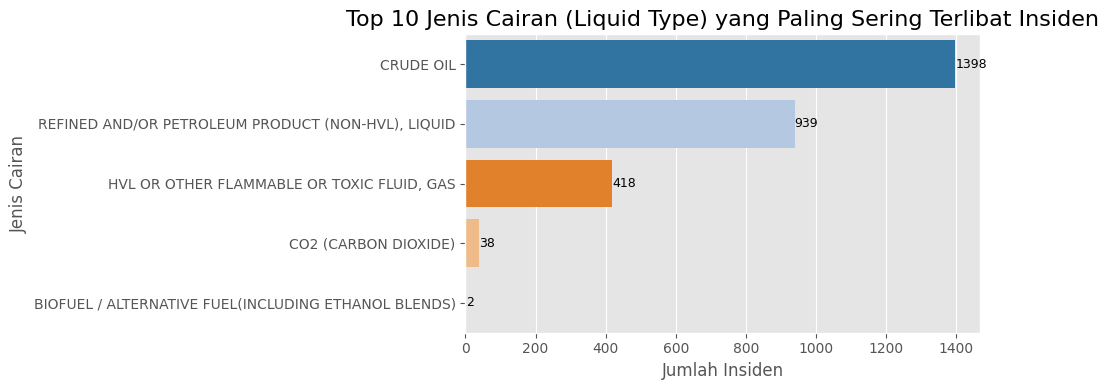

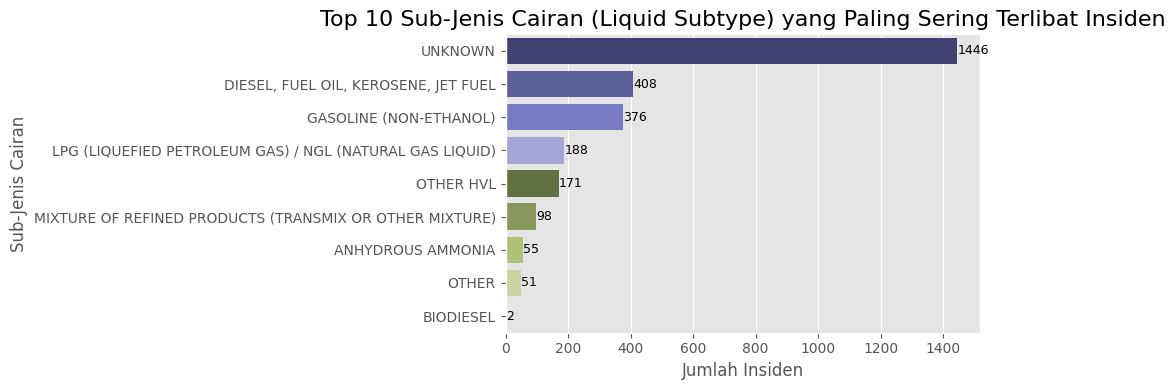

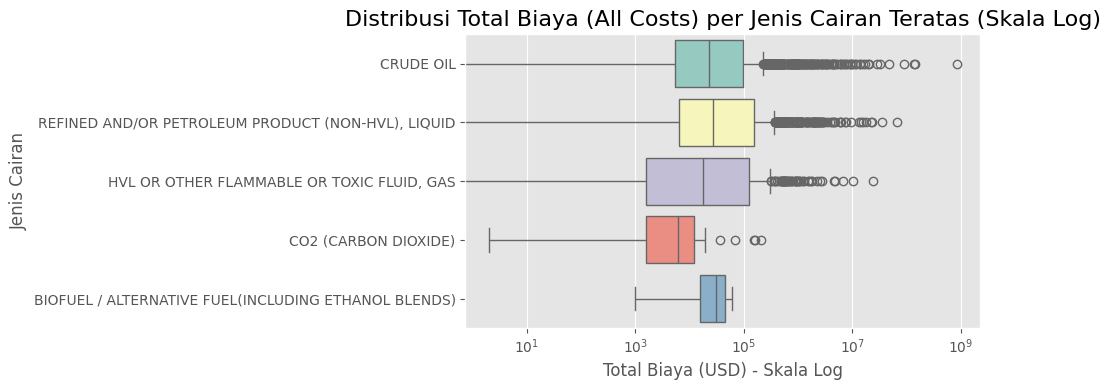

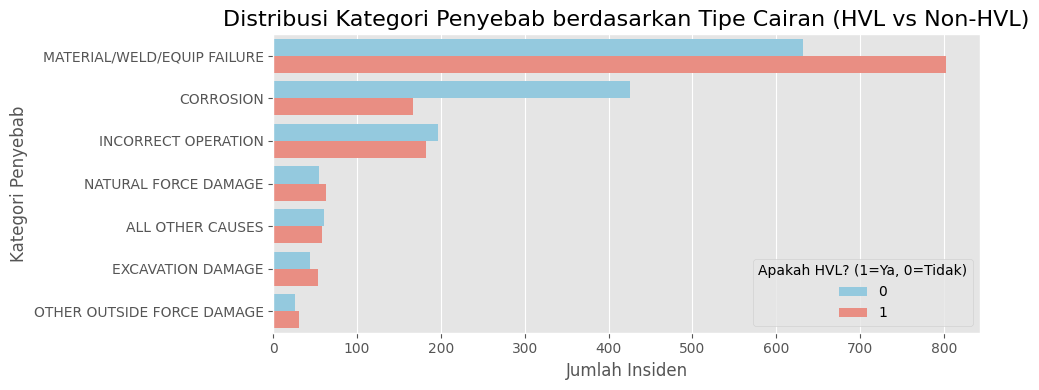

In [17]:
# --- Analisis Frekuensi Liquid Type ---
if 'Liquid Type' in df.columns:
    liquid_type_counts = df['Liquid Type'].value_counts().head(10)

    plt.figure(figsize=(10, 4))
    ax_liq_type = sns.barplot(x=liquid_type_counts.values, y=liquid_type_counts.index,
                              hue=liquid_type_counts.index, palette="tab20", legend=False, orient='h')
    plt.title('Top 10 Jenis Cairan (Liquid Type) yang Paling Sering Terlibat Insiden', fontsize=16)
    plt.xlabel('Jumlah Insiden', fontsize=12)
    plt.ylabel('Jenis Cairan', fontsize=12)
    for i in ax_liq_type.containers:
        ax_liq_type.bar_label(i, label_type='edge', fontsize=9)
    plt.tight_layout()
    plt.show()

# --- Analisis Frekuensi Liquid Subtype ---
if 'Liquid Subtype' in df.columns:
    liquid_subtype_counts = df['Liquid Subtype'].value_counts().head(10)

    plt.figure(figsize=(10, 4))
    # Modifikasi untuk menghilangkan FutureWarning:
    ax_liq_subtype = sns.barplot(x=liquid_subtype_counts.values, y=liquid_subtype_counts.index,
                                 hue=liquid_subtype_counts.index, palette="tab20b", legend=False, orient='h')
    plt.title('Top 10 Sub-Jenis Cairan (Liquid Subtype) yang Paling Sering Terlibat Insiden', fontsize=16)
    plt.xlabel('Jumlah Insiden', fontsize=12)
    plt.ylabel('Sub-Jenis Cairan', fontsize=12)
    for i in ax_liq_subtype.containers:
        ax_liq_subtype.bar_label(i, label_type='edge', fontsize=9)
    plt.tight_layout()
    plt.show()

# --- Analisis Dampak (All Costs) berdasarkan Liquid Type (Top 5 Liquid Types) ---
if 'Liquid Type' in df.columns and 'All Costs' in df.columns:
    top_liquid_types = df['Liquid Type'].value_counts().nlargest(5).index
    df_top_liquid = df[df['Liquid Type'].isin(top_liquid_types)]

    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df_top_liquid, x='All Costs', y='Liquid Type', 
                hue='Liquid Type', palette="Set3", order=top_liquid_types, orient='h', legend=False, dodge=False)
    plt.title('Distribusi Total Biaya (All Costs) per Jenis Cairan Teratas (Skala Log)', fontsize=16)
    plt.xlabel('Total Biaya (USD) - Skala Log', fontsize=12)
    plt.ylabel('Jenis Cairan', fontsize=12)
    plt.xscale('log')
    plt.tight_layout()
    plt.show()

# --- Analisis Penyebab Kecelakaan berdasarkan Liquid Type (Menggunakan fitur Is_HVL) ---
if 'Is_HVL' in df.columns and 'Cause Category' in df.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, y='Cause Category', hue='Is_HVL', palette={0: "skyblue", 1: "salmon"},
                  order = df['Cause Category'].value_counts().index)
    plt.title('Distribusi Kategori Penyebab berdasarkan Tipe Cairan (HVL vs Non-HVL)', fontsize=16)
    plt.xlabel('Jumlah Insiden', fontsize=12)
    plt.ylabel('Kategori Penyebab', fontsize=12)
    plt.legend(title='Apakah HVL? (1=Ya, 0=Tidak)')
    plt.tight_layout()
    plt.show()

Analisis jenis cairan yang terlibat dalam insiden pipa memberikan wawasan berikut:
1. Jenis Cairan (Liquid Type) Terlibat Insiden:CRUDE OIL (Minyak Mentah) adalah jenis cairan yang paling sering terlibat dalam insiden, dengan jumlah kasus mencapai hampir 1400. REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID (Produk Olahan Minyak Bumi Non-HVL) menempati urutan kedua dengan lebih dari 900 insiden. HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS (Cairan Mudah Terbakar/Beracun Tinggi, Gas) juga signifikan dengan lebih dari 400 insiden. Jenis cairan lain seperti CO2 (CARBON DIOXIDE) dan BIOFUEL memiliki frekuensi yang jauh lebih rendah.

2. Sub-Jenis Cairan (Liquid Subtype) Terlibat Insiden: Kategori UNKNOWN mendominasi, menunjukkan bahwa sub-jenis cairan seringkali tidak tercatat secara spesifik (lebih dari 1400 kasus). Ini bisa menjadi area untuk perbaikan pencatatan data di masa depan. Di antara sub-jenis yang teridentifikasi, DIESEL, FUEL OIL, KEROSENE, JET FUEL (sekitar 408 insiden) dan GASOLINE (NON-ETHANOL) (sekitar 376 insiden) adalah yang paling umum. LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL GAS LIQUID) dan OTHER HVL juga cukup sering muncul.

3. Distribusi Total Biaya (All Costs) per Jenis Cairan Teratas: Boxplot (dengan skala log) menunjukkan bahwa meskipun CRUDE OIL paling sering terlibat, distribusi biayanya memiliki rentang yang luas dengan beberapa outlier yang sangat tinggi. Median biayanya tampak sebanding atau sedikit lebih tinggi dari REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID. HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS juga menunjukkan potensi biaya yang signifikan, dengan sebaran yang cukup lebar dan beberapa outlier bernilai tinggi. CO2 (CARBON DIOXIDE) dan BIOFUEL umumnya memiliki total biaya yang lebih rendah per insiden, meskipun tetap ada variasi.

3. Distribusi Kategori Penyebab berdasarkan Tipe Cairan (HVL vs Non-HVL): Untuk penyebab utama seperti MATERIAL/WELD/EQUIP FAILURE, baik insiden yang melibatkan HVL (ditandai sebagai 1, warna salmon) maupun non-HVL (ditandai sebagai 0, warna biru muda) sama-sama menunjukkan jumlah yang tinggi. Namun, insiden non-HVL tampak sedikit lebih banyak untuk kategori kegagalan material/peralatan ini. Pada kategori CORROSION, insiden non-HVL jauh lebih dominan dibandingkan HVL. Untuk INCORRECT OPERATION, insiden non-HVL juga lebih banyak. 
Secara umum, insiden yang tidak melibatkan HVL (non-HVL) tampak lebih mendominasi di sebagian besar kategori penyebab utama.

Kesimpulan Awal dari Analisis Jenis Cairan:
Minyak mentah dan produk olahan non-HVL adalah jenis cairan yang paling sering terlibat dalam kecelakaan. Meskipun demikian, insiden yang melibatkan HVL juga signifikan dan berpotensi memiliki dampak biaya yang besar. Korosi tampaknya lebih sering menjadi masalah pada pipa yang mengangkut cairan non-HVL. Data Liquid Subtype yang banyak "UNKNOWN" menunjukkan perlunya detail pencatatan yang lebih baik.

##### 2.6: Analisis Jenis Pipa dan Lokasi Pipa
Karakteristik fisik pipa, seperti jenisnya (misalnya, di atas tanah, di bawah tanah, tangki) dan lokasinya (darat atau lepas pantai), juga dapat mempengaruhi frekuensi dan jenis kecelakaan.
Kita akan menganalisis:
1. Frekuensi insiden berdasarkan Pipeline Type dan Pipeline Location.
2. Apakah ada jenis atau lokasi pipa tertentu yang lebih rentan terhadap kerugian atau biaya tinggi (ini bisa menjadi analisis lanjutan jika diinginkan).
3. Hubungan antara jenis/lokasi pipa dengan Cause Category.

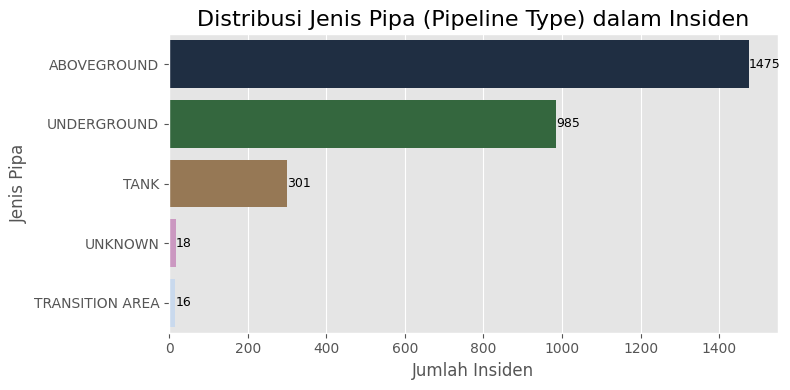

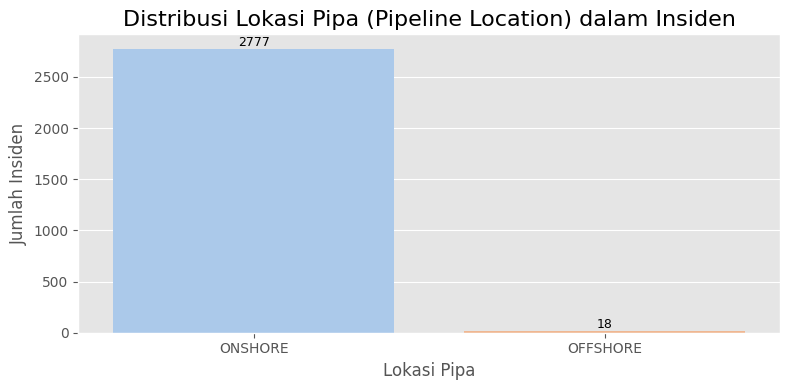

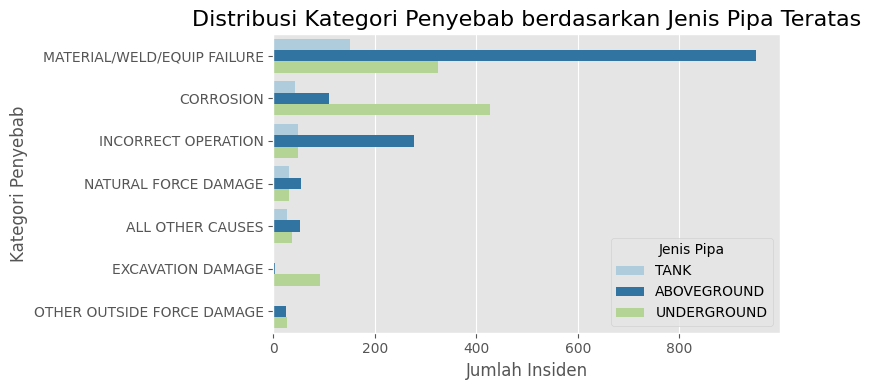

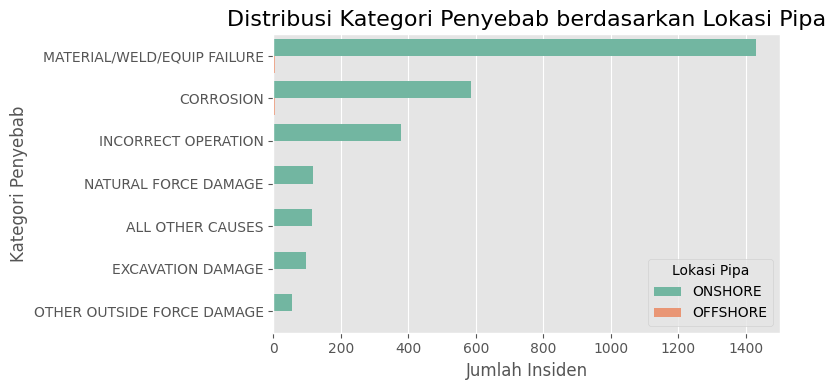

In [19]:
# --- Analisis Frekuensi Pipeline Type ---
if 'Pipeline Type' in df.columns:
    pipeline_type_counts = df['Pipeline Type'].value_counts().head(10) 
    plt.figure(figsize=(8, 4))
    ax_pipe_type = sns.barplot(x=pipeline_type_counts.values, y=pipeline_type_counts.index,
                               hue=pipeline_type_counts.index, palette="cubehelix", legend=False, orient='h', dodge=False)
    plt.title('Distribusi Jenis Pipa (Pipeline Type) dalam Insiden', fontsize=16)
    plt.xlabel('Jumlah Insiden', fontsize=12)
    plt.ylabel('Jenis Pipa', fontsize=12)
    for i in ax_pipe_type.containers:
        ax_pipe_type.bar_label(i, label_type='edge', fontsize=9)
    plt.tight_layout()
    plt.show()

# --- Analisis Frekuensi Pipeline Location ---
if 'Pipeline Location' in df.columns:
    pipeline_location_counts = df['Pipeline Location'].value_counts()
    plt.figure(figsize=(8, 4))
    ax_pipe_loc = sns.barplot(x=pipeline_location_counts.index, y=pipeline_location_counts.values,
                              hue=pipeline_location_counts.index, palette="pastel", legend=False, dodge=False)
    plt.title('Distribusi Lokasi Pipa (Pipeline Location) dalam Insiden', fontsize=16)
    plt.xlabel('Lokasi Pipa', fontsize=12)
    plt.ylabel('Jumlah Insiden', fontsize=12)
    for i in ax_pipe_loc.containers:
        ax_pipe_loc.bar_label(i, label_type='edge', fontsize=9)
    plt.tight_layout()
    plt.show()

# --- Analisis Penyebab Kecelakaan berdasarkan Pipeline Type (Top 3 Types) ---
if 'Pipeline Type' in df.columns and 'Cause Category' in df.columns:
    top_pipeline_types = df['Pipeline Type'].value_counts().nlargest(3).index
    df_top_pipe_types = df[df['Pipeline Type'].isin(top_pipeline_types)]
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_top_pipe_types, y='Cause Category', hue='Pipeline Type',
                  order = df_top_pipe_types['Cause Category'].value_counts().index,
                  palette = "Paired")
    plt.title('Distribusi Kategori Penyebab berdasarkan Jenis Pipa Teratas', fontsize=16)
    plt.xlabel('Jumlah Insiden', fontsize=12)
    plt.ylabel('Kategori Penyebab', fontsize=12)
    plt.legend(title='Jenis Pipa', loc='lower right')
    plt.tight_layout()
    plt.show()

# --- Analisis Penyebab Kecelakaan berdasarkan Pipeline Location ---
if 'Pipeline Location' in df.columns and 'Cause Category' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y='Cause Category', hue='Pipeline Location',
                  order = df['Cause Category'].value_counts().index,
                  palette = "Set2")
    plt.title('Distribusi Kategori Penyebab berdasarkan Lokasi Pipa', fontsize=16)
    plt.xlabel('Jumlah Insiden', fontsize=12)
    plt.ylabel('Kategori Penyebab', fontsize=12)
    plt.legend(title='Lokasi Pipa', loc='lower right')
    plt.tight_layout()
    plt.show()

Analisis jenis dan lokasi pipa menunjukkan:
1. Jenis Pipa Terlibat: Pipa ABOVEGROUND (1475 kasus) paling sering mengalami insiden, diikuti UNDERGROUND (985 kasus) dan TANK (301 kasus).
2. Lokasi Insiden: Mayoritas besar insiden (2777 kasus) terjadi pada pipa ONSHORE (di darat), dengan insiden OFFSHORE (lepas pantai) sangat minim (18 kasus).
3. Penyebab vs. Jenis Pipa:
    - MATERIAL/WELD/EQUIP FAILURE mendominasi sebagai penyebab utama untuk ketiga jenis pipa teratas (ABOVEGROUND, UNDERGROUND, TANK).
    - Pipa ABOVEGROUND juga rentan terhadap INCORRECT OPERATION dan CORROSION.
    - Pipa UNDERGROUND signifikan dipengaruhi oleh CORROSION dan EXCAVATION DAMAGE.
4. Penyebab vs. Lokasi Pipa: Karena dominasi insiden ONSHORE, hampir semua kategori penyebab utama juga didominasi oleh lokasi ini. Data insiden OFFSHORE terlalu sedikit untuk analisis penyebab yang mendalam.

Kesimpulan Awal (Jenis & Lokasi Pipa):
Insiden paling banyak terjadi pada pipa di atas tanah dan di darat. Kegagalan material/peralatan adalah penyebab utama lintas jenis pipa, dengan korosi menjadi masalah signifikan terutama untuk pipa bawah tanah dan tangki.

##### 2.7: Analisis Operator
Perusahaan operator pipa memiliki tanggung jawab utama dalam menjaga keamanan dan integritas infrastruktur mereka. Menganalisis data berdasarkan operator dapat membantu mengidentifikasi operator dengan frekuensi insiden atau dampak kerugian yang lebih tinggi. Kita juga akan memanfaatkan fitur agregat yang telah dibuat sebelumnya (Previous_Incidents_Operator, Avg_AllCosts_Operator, Avg_NetLoss_Operator) untuk melihat apakah ada pola terkait operator tertentu.

Kita akan melihat:
1. Operator dengan jumlah insiden terbanyak.
2. Operator dengan total biaya insiden tertinggi.
3. Operator dengan rata-rata biaya per insiden tertinggi.

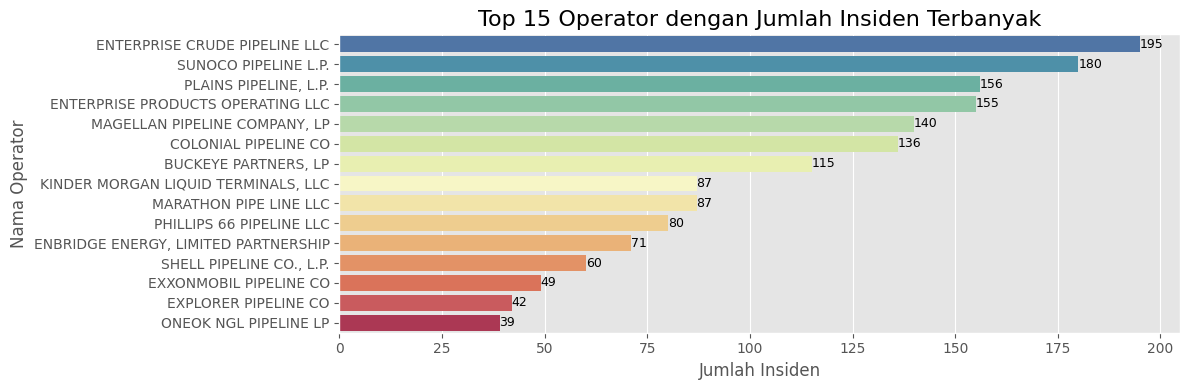

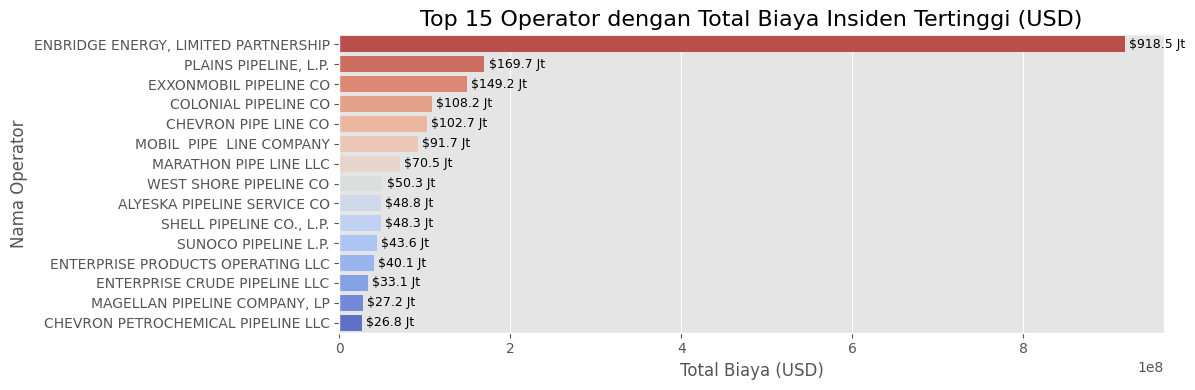

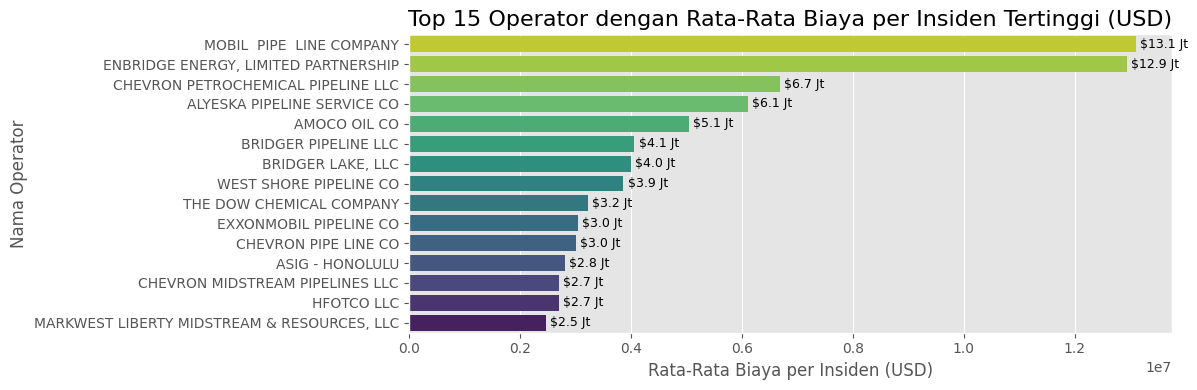

In [ ]:
# --- Analisis Operator dengan Insiden Terbanyak ---
if 'Operator Name' in df.columns:
    operator_incident_counts = df['Operator Name'].value_counts().head(15) # Top 15

    plt.figure(figsize=(12, 4))
    ax_op_inc = sns.barplot(x=operator_incident_counts.values, y=operator_incident_counts.index,
                            hue=operator_incident_counts.index, palette="Spectral_r", legend=False, orient='h', dodge=False)
    plt.title('Top 15 Operator dengan Jumlah Insiden Terbanyak', fontsize=16)
    plt.xlabel('Jumlah Insiden', fontsize=12)
    plt.ylabel('Nama Operator', fontsize=12)
    for i in ax_op_inc.containers:
        ax_op_inc.bar_label(i, label_type='edge', fontsize=9)
    plt.tight_layout()
    plt.show()

# --- Analisis Operator dengan Total Biaya Tertinggi ---
if 'Operator Name' in df.columns and 'All Costs' in df.columns:
    operator_total_costs = df.groupby('Operator Name')['All Costs'].sum().sort_values(ascending=False).head(15)

    plt.figure(figsize=(12, 4))
    ax_op_cost = sns.barplot(x=operator_total_costs.values, y=operator_total_costs.index,
                             hue=operator_total_costs.index, palette="coolwarm_r", legend=False, orient='h', dodge=False)
    plt.title('Top 15 Operator dengan Total Biaya Insiden Tertinggi (USD)', fontsize=16)
    plt.xlabel('Total Biaya (USD)', fontsize=12)
    plt.ylabel('Nama Operator', fontsize=12)
    
    for container in ax_op_cost.containers:
        labels = [f'${c/1e6:,.1f} Jt' if c >= 1e6 else f'${c:,.0f}' for c in container.datavalues]
        ax_op_cost.bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=3)
    plt.tight_layout()
    plt.show()

# --- Analisis Operator dengan Rata-Rata Biaya per Insiden Tertinggi (menggunakan fitur agregat) ---
if 'Operator Name' in df.columns and 'Avg_AllCosts_Operator' in df.columns:
    avg_costs_per_operator_unique = df.drop_duplicates(subset=['Operator Name'])[['Operator Name', 'Avg_AllCosts_Operator']]
    top_avg_cost_operators = avg_costs_per_operator_unique.sort_values(by='Avg_AllCosts_Operator', ascending=False).head(15)

    plt.figure(figsize=(12, 4))
    ax_op_avg_cost = sns.barplot(x=top_avg_cost_operators['Avg_AllCosts_Operator'], 
                                 y=top_avg_cost_operators['Operator Name'],
                                 hue=top_avg_cost_operators['Operator Name'],
                                 palette="viridis_r", legend=False, orient='h', dodge=False)
    plt.title('Top 15 Operator dengan Rata-Rata Biaya per Insiden Tertinggi (USD)', fontsize=16)
    plt.xlabel('Rata-Rata Biaya per Insiden (USD)', fontsize=12)
    plt.ylabel('Nama Operator', fontsize=12)

    for container in ax_op_avg_cost.containers:
        labels = [f'${c/1e6:,.1f} Jt' if c >= 1e6 else f'${c:,.0f}' for c in container.datavalues]
        ax_op_avg_cost.bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=3)
    plt.tight_layout()
    plt.show()

Analisis data berdasarkan operator pipa mengungkapkan beberapa poin penting:
1. Operator dengan Jumlah Insiden Terbanyak:
- ENTERPRISE CRUDE PIPELINE LLC (195 insiden), SUNOCO PIPELINE L.P. (180 insiden), dan PLAINS PIPELINE, L.P. (156 insiden) adalah tiga operator dengan frekuensi insiden tertinggi dalam dataset ini.
- Beberapa operator besar lainnya seperti ENTERPRISE PRODUCTS OPERATING LLC, MAGELLAN PIPELINE COMPANY, LP, dan COLONIAL PIPELINE CO juga menunjukkan jumlah insiden yang signifikan.

2. Operator dengan Total Biaya Insiden Tertinggi:
- ENBRIDGE ENERGY, LIMITED PARTNERSHIP menonjol dengan total biaya insiden tertinggi, mencapai sekitar $918,5 Juta, jauh melampaui operator lainnya.
- PLAINS PIPELINE, L.P. ($169,7 Jt), EXXONMOBIL PIPELINE CO ($149,2 Jt), dan COLONIAL PIPELINE CO ($108,2 Jt) juga mencatatkan total biaya yang sangat besar.
- Menariknya, ENTERPRISE CRUDE PIPELINE LLC yang memiliki insiden terbanyak, berada di peringkat lebih rendah dalam hal total biaya ($33,1 Jt), menunjukkan bahwa banyak insiden mereka mungkin tidak berbiaya sangat tinggi secara individual.

3. Operator dengan Rata-Rata Biaya per Insiden Tertinggi:
- MOBIL PIPE LINE COMPANY menunjukkan rata-rata biaya per insiden tertinggi, sekitar $13,1 Juta.
- ENBRIDGE ENERGY, LIMITED PARTNERSHIP juga memiliki rata-rata biaya per insiden yang sangat tinggi, sekitar $12,9 Juta, yang konsisten dengan total biayanya yang besar meskipun jumlah insidennya tidak sebanyak operator teratas dalam frekuensi.
- Operator lain seperti CHEVRON PETROCHEMICAL PIPELINE LLC, ALYESKA PIPELINE SERVICE CO, dan AMOCO OIL CO juga memiliki rata-rata biaya per insiden yang tinggi, meskipun mungkin jumlah total insiden atau total biaya absolut mereka tidak sebesar yang lain.

Kesimpulan Awal dari Analisis Operator:
Frekuensi insiden tidak selalu berkorelasi langsung dengan total biaya atau rata-rata biaya per insiden. Beberapa operator mungkin sering mengalami insiden tetapi dengan dampak finansial yang lebih terkendali per kejadian. Sebaliknya, operator lain mungkin memiliki lebih sedikit insiden, tetapi setiap insiden yang terjadi cenderung sangat mahal. ENBRIDGE ENERGY, LIMITED PARTNERSHIP adalah contoh operator yang menonjol baik dari segi total biaya maupun rata-rata biaya per insiden. Temuan ini penting untuk memahami profil risiko yang berbeda antar operator.

##### 2.8: Analisis Korelasi Antar Fitur Numerik
Untuk memahami bagaimana berbagai variabel numerik saling berhubungan, kita dapat menghitung dan memvisualisasikan matriks korelasi. Ini akan menunjukkan seberapa kuat hubungan antara jumlah tumpahan dengan total biaya, atau antara berbagai komponen biaya. Kita akan fokus pada korelasi antar variabel numerik utama terkait dampak insiden. Koefisien korelasi Pearson akan digunakan, yang mengukur hubungan linear antara dua variabel.

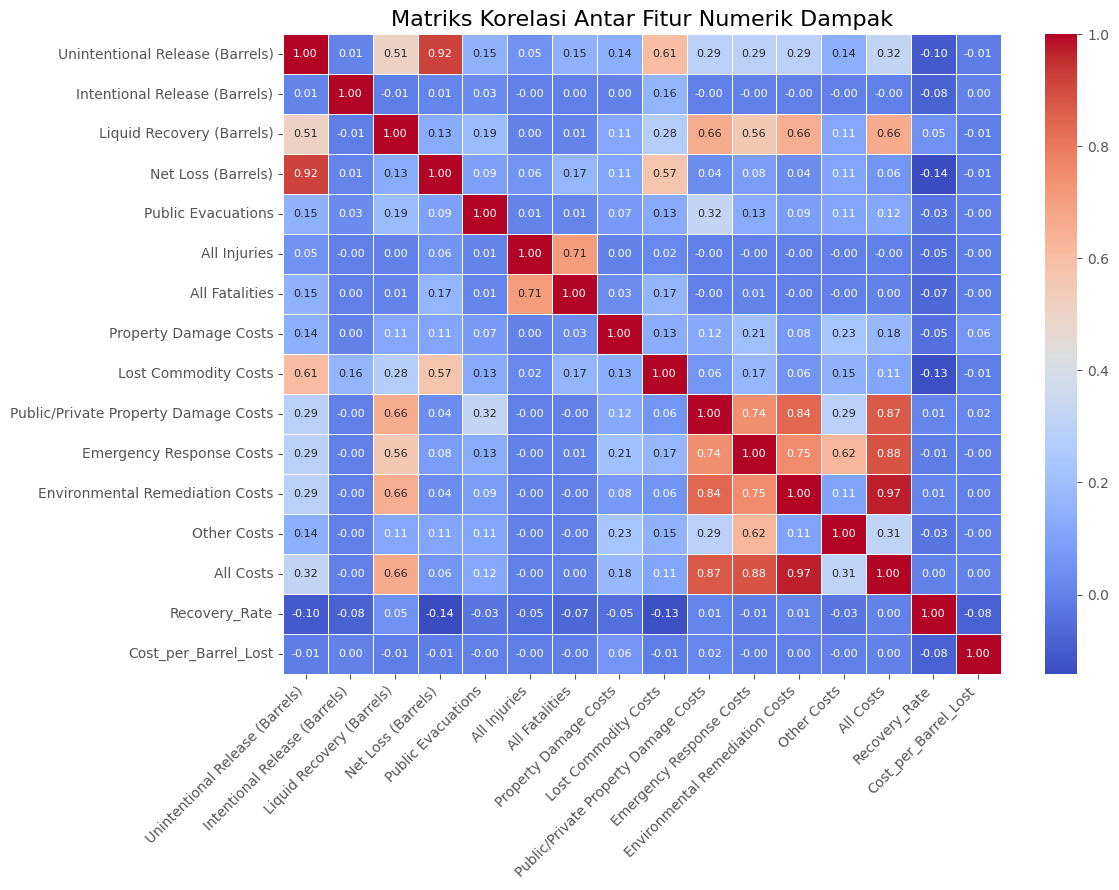

In [ ]:
# --- Matriks Korelasi untuk Fitur Numerik Dampak ---
numerical_impact_cols = [
    'Unintentional Release (Barrels)', 'Intentional Release (Barrels)', 
    'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 
    'Public Evacuations', 'All Injuries', 'All Fatalities', 
    'Property Damage Costs', 'Lost Commodity Costs', 
    'Public/Private Property Damage Costs', 'Emergency Response Costs', 
    'Environmental Remediation Costs', 'Other Costs', 'All Costs',
    'Recovery_Rate', 'Cost_per_Barrel_Lost' 
]

existing_numerical_impact_cols = [col for col in numerical_impact_cols if col in df.columns]

if existing_numerical_impact_cols:
    correlation_matrix = df[existing_numerical_impact_cols].corr()

    plt.figure(figsize=(12, 9)) 
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8}) # Ukuran font anotasi disesuaikan
    plt.title('Matriks Korelasi Antar Fitur Numerik Dampak', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10) 
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom numerik dampak yang cukup untuk analisis korelasi.")


Net Loss (Barrels) (Kerugian Bersih Barel) memiliki korelasi positif yang sangat tinggi (0.92) dengan Unintentional Release (Barrels) (Pelepasan Tidak Disengaja Barel), mengindikasikan bahwa peningkatan volume pelepasan yang tidak disengaja sangat sejalan dengan peningkatan kerugian bersih. Selanjutnya, All Costs (Semua Biaya) menunjukkan korelasi positif yang sangat kuat dengan beberapa komponen biaya lainnya, terutama dengan Environmental Remediation Costs (Biaya Remediasi Lingkungan) sebesar 0.97, Emergency Response Costs (Biaya Tanggap Darurat) sebesar 0.88, dan Public/Private Property Damage Costs (Biaya Kerusakan Properti Publik/Swasta) sebesar 0.87.

##### 2.9: Analisis Mendalam pada Kasus-Kasus Ekstrem


============================== Analisis Karakteristik Insiden dengan Biaya Ekstrem (Outlier All Costs) ==============================

Batas Atas Outlier Biaya (IQR Method): $285,522.00
Jumlah Insiden dengan Biaya Ekstrem (Outlier): 418 dari 2795 insiden (14.96%)


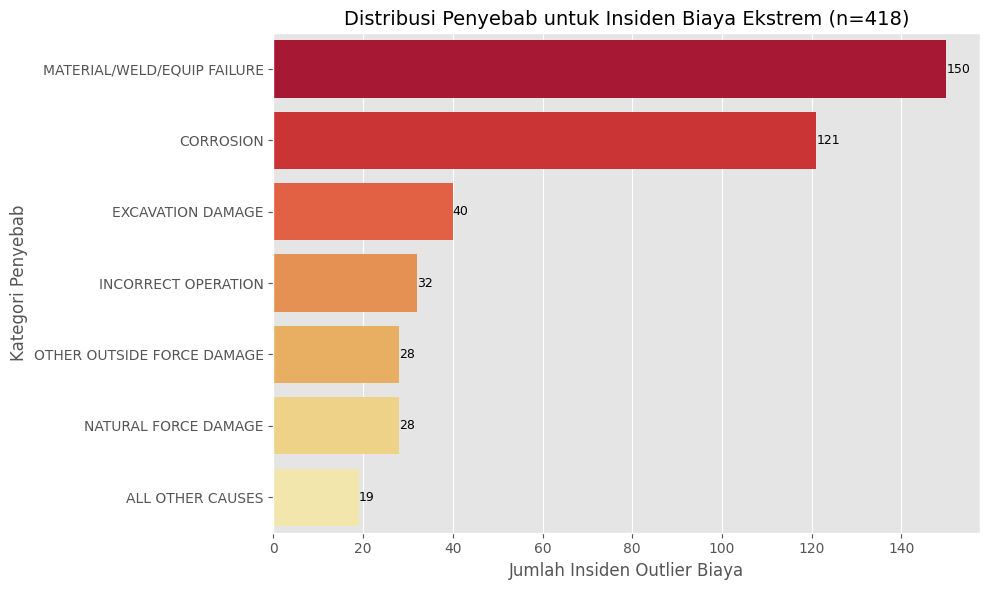

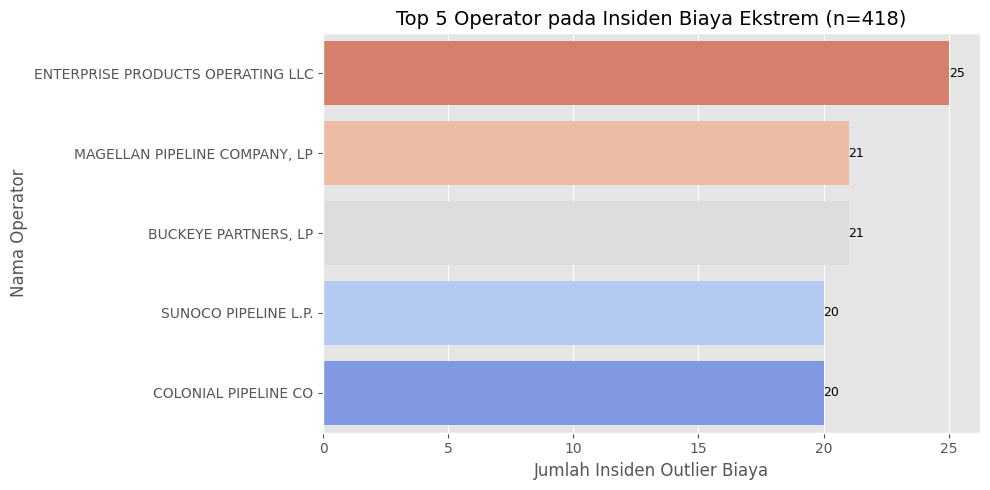

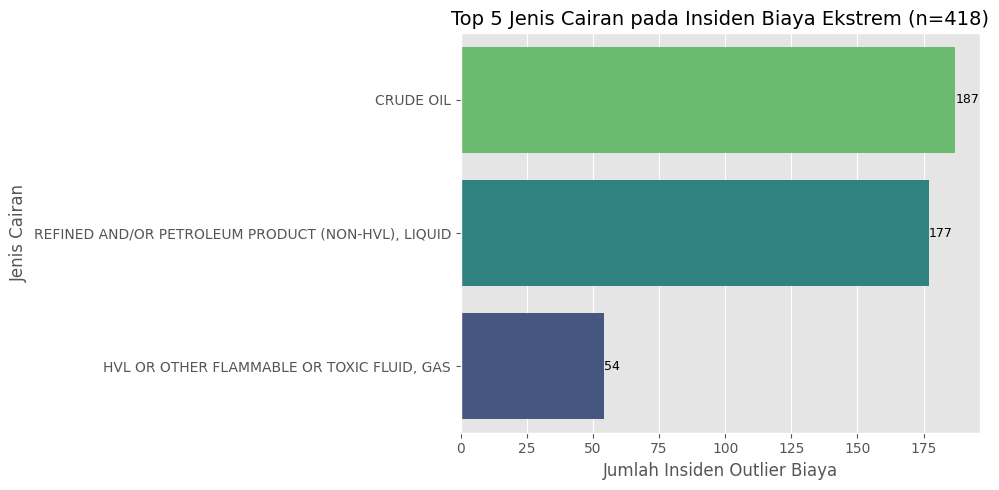

In [ ]:
# Pastikan DataFrame 'df' sudah ada dan kolom 'All Costs' tersedia.
if 'All Costs' in df.columns:
    print("\n" + "="*30 + " Analisis Karakteristik Insiden dengan Biaya Ekstrem (Outlier All Costs) " + "="*30)

    # 1. Mengidentifikasi Outlier Biaya menggunakan IQR
    Q1_costs = df['All Costs'].quantile(0.25)
    Q3_costs = df['All Costs'].quantile(0.75)
    IQR_costs = Q3_costs - Q1_costs
    upper_bound_costs = Q3_costs + 1.5 * IQR_costs
    # lower_bound_costs = Q1_costs - 1.5 * IQR_costs # Biaya biasanya tidak negatif

    df_cost_outliers = df[df['All Costs'] > upper_bound_costs].copy() # Buat salinan untuk menghindari SettingWithCopyWarning
    num_outliers = len(df_cost_outliers)
    total_incidents = len(df)
    percentage_outliers = (num_outliers / total_incidents) * 100

    print(f"\nBatas Atas Outlier Biaya (IQR Method): ${upper_bound_costs:,.2f}")
    print(f"Jumlah Insiden dengan Biaya Ekstrem (Outlier): {num_outliers} dari {total_incidents} insiden ({percentage_outliers:.2f}%)")

    if num_outliers > 0:
        # 2. Distribusi Kategori Penyebab untuk Insiden Outlier Biaya
        if 'Cause Category' in df_cost_outliers.columns:
            cause_category_outliers_counts = df_cost_outliers['Cause Category'].value_counts()
            
            plt.figure(figsize=(10, 6))
            ax_cause_outliers = sns.barplot(x=cause_category_outliers_counts.values, 
                                            y=cause_category_outliers_counts.index,
                                            hue=cause_category_outliers_counts.index, 
                                            palette="YlOrRd_r", legend=False, orient='h', dodge=False)
            plt.title(f'Distribusi Penyebab untuk Insiden Biaya Ekstrem (n={num_outliers})', fontsize=14)
            plt.xlabel('Jumlah Insiden Outlier Biaya', fontsize=12)
            plt.ylabel('Kategori Penyebab', fontsize=12)
            for i in ax_cause_outliers.containers:
                ax_cause_outliers.bar_label(i, label_type='edge', fontsize=9)
            plt.tight_layout()
            plt.show()

        # 3. Operator yang Terlibat dalam Insiden Outlier Biaya (Top 5)
        if 'Operator Name' in df_cost_outliers.columns:
            operator_outliers_counts = df_cost_outliers['Operator Name'].value_counts().head(5)
            
            plt.figure(figsize=(10, 5))
            ax_op_outliers = sns.barplot(x=operator_outliers_counts.values, 
                                         y=operator_outliers_counts.index,
                                         hue=operator_outliers_counts.index, 
                                         palette="coolwarm_r", legend=False, orient='h', dodge=False)
            plt.title(f'Top 5 Operator pada Insiden Biaya Ekstrem (n={num_outliers})', fontsize=14)
            plt.xlabel('Jumlah Insiden Outlier Biaya', fontsize=12)
            plt.ylabel('Nama Operator', fontsize=12)
            for i in ax_op_outliers.containers:
                ax_op_outliers.bar_label(i, label_type='edge', fontsize=9)
            plt.tight_layout()
            plt.show()

        # 4. Jenis Cairan yang Terlibat dalam Insiden Outlier Biaya (Top 5)
        if 'Liquid Type' in df_cost_outliers.columns:
            liquid_type_outliers_counts = df_cost_outliers['Liquid Type'].value_counts().head(5)
            
            plt.figure(figsize=(10, 5))
            ax_liq_outliers = sns.barplot(x=liquid_type_outliers_counts.values, 
                                          y=liquid_type_outliers_counts.index,
                                          hue=liquid_type_outliers_counts.index, 
                                          palette="viridis_r", legend=False, orient='h', dodge=False)
            plt.title(f'Top 5 Jenis Cairan pada Insiden Biaya Ekstrem (n={num_outliers})', fontsize=14)
            plt.xlabel('Jumlah Insiden Outlier Biaya', fontsize=12)
            plt.ylabel('Jenis Cairan', fontsize=12)
            for i in ax_liq_outliers.containers:
                ax_liq_outliers.bar_label(i, label_type='edge', fontsize=9)
            plt.tight_layout()
            plt.show()
            
    else:
        print("Tidak ditemukan insiden dengan biaya ekstrem berdasarkan metode IQR.")
else:
    print("Kolom 'All Costs' tidak ditemukan. Analisis outlier biaya tidak dapat dilakukan.")

Berdasarkan data, penyebab utama insiden biaya ekstrem adalah kegagalan material, las, atau peralatan (MATERIAL/WELD/EQUIP FAILURE) yang menyumbang 150 kasus, diikuti oleh korosi (CORROSION) dengan 121 kasus. Dari sisi operator, ENTERPRISE PRODUCTS OPERATING LLC tercatat sebagai operator dengan jumlah insiden biaya ekstrem terbanyak, yaitu 25 insiden. Sementara itu, jenis cairan yang paling sering terlibat dalam insiden biaya ekstrem adalah minyak mentah (CRUDE OIL) dengan 187 insiden, disusul oleh produk minyak bumi olahan atau non-HVL cair (REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID) sebanyak 177 insiden.

##### 2.10 (Tahap Akhir EDA): Menyimpan DataFrame Hasil Proses
Setelah menyelesaikan semua tahapan pembersihan, rekayasa fitur, dan analisis eksploratif pada Proyek 1, langkah penting berikutnya adalah menyimpan DataFrame df yang telah diproses. Ini memungkinkan kita untuk menggunakan data yang sudah bersih dan kaya fitur ini sebagai titik awal untuk proyek-proyek selanjutnya.

In [ ]:
nama_file_output = 'pipeline_accidents_processed_eda.csv'
df.to_csv(nama_file_output, index=False)
print(f"DataFrame berhasil disimpan sebagai '{nama_file_output}'")

DataFrame berhasil disimpan sebagai 'pipeline_accidents_processed_eda.csv'


### Tahap 3: Ringkasan dan Kesimpulan 
Dari angka dan grafik, kini kita bisa merangkai sebuah cerita, menjawab pertanyaan-pertanyaan kunci yang menjadi panduan analisis kita. Beberapa pertanyaan yang berhasil dijawab :
1. Mengapa kecelakaan terjadi? Data dengan jelas menunjuk pada "Kegagalan Material, Las, atau Peralatan" sebagai biang keladi utama, mencerminkan masalah pada integritas fisik sistem. Korosi, baik internal maupun eksternal, terus menjadi ancaman laten, sementara "Kesalahan Operasional" mengingatkan kita akan peran faktor manusia dalam risiko insiden.

2. Kapan waktu berisiko tinggi? Ternyata, risiko tidak mengenal hari libur. Hari kerja, terutama Senin dan Selasa pada jam operasional pagi hingga siang (09:00-14:00), menunjukkan frekuensi insiden yang lebih tinggi. Bulan-bulan awal tahun seperti Januari juga menunjukkan peningkatan, yang mungkin terkait dengan faktor musiman atau aktivitas operasional.

3. Di mana titik rawan berada? Secara frekuensi, Texas menjadi negara bagian dengan jumlah insiden tertinggi. Namun, jika kita berbicara dampak finansial, Michigan dan California justru lebih menonjol, di mana satu insiden bisa menimbulkan kerugian yang sangat besar. Ini mengajarkan bahwa risiko tak hanya diukur dari kuantitas, tapi juga intensitas dampaknya.

4. Seberapa besar dampaknya? Mayoritas insiden berskala kecil hingga sedang, namun beberapa kasus ekstrem dengan tumpahan masif atau biaya pemulihan yang fantastis menjadi perhatian utama. Biaya kerusakan properti, pemulihan lingkungan, dan respons darurat menjadi komponen pengeluaran terbesar. Meskipun volume tumpahan berkorelasi positif dengan total biaya, faktor lain seperti lokasi dan jenis cairan juga sangat menentukan.

5. Cairan apa yang paling berisiko? Minyak mentah (CRUDE OIL) dan produk olahan non-HVL paling sering terlibat, kemungkinan karena volume transportasinya yang tinggi. Namun, insiden yang melibatkan cairan berbahaya tinggi (HVL) cenderung memiliki biaya lebih tinggi per kejadian. Banyaknya data "UNKNOWN" pada sub-jenis cairan menjadi catatan penting untuk perbaikan kualitas data.

6. Jenis dan lokasi pipa mana yang rentan? Insiden paling banyak terjadi pada pipa di atas tanah (ABOVEGROUND) dan yang berlokasi di darat (ONSHORE). Sementara itu, pipa bawah tanah dan tangki lebih rentan terhadap serangan korosi.

7. Operator mana yang perlu perhatian lebih? Beberapa operator seperti ENTERPRISE CRUDE PIPELINE LLC, SUNOCO PIPELINE L.P., dan PLAINS PIPELINE, L.P. sering muncul dalam catatan insiden. Namun, dari sisi total biaya, ENBRIDGE ENERGY, LIMITED PARTNERSHIP menjadi yang tertinggi, menunjukkan bahwa frekuensi dan besarnya dampak finansial perlu dievaluasi secara bersamaan.

8. Bagaimana variabel dampak saling terkait? Volume tumpahan sangat erat kaitannya dengan kerugian bersih, dan total biaya sangat dipengaruhi oleh ongkos pemulihan lingkungan, kerusakan properti, serta respons darurat.

9. Seperti apa skenario terburuk? Dengan menelisik lima insiden terbesar dari segi kerugian dan biaya, kita mendapat gambaran konkret bagaimana kombinasi berbagai faktor dapat berujung pada insiden berskala masif, memberikan pelajaran berharga untuk strategi pencegahan.

Dari temuan-temuan ini, beberapa rekomendasi dapat dipertimbangkan:
- Penguatan Inspeksi dan Pemeliharaan: Fokus pada area berisiko tinggi, infrastruktur tua, dan jenis pipa yang rentan.
- Program Manajemen Korosi yang Komprehensif: Prioritaskan deteksi dini korosi internal dan eksternal.
- Peningkatan Prosedur Operasional dan Pelatihan: Minimalkan human error.
- Kewaspadaan Berbasis Waktu dan Lokasi: Antisipasi risiko pada jam kerja, awal tahun, dan di negara bagian dengan catatan buruk.
- Fokus pada Operator: Lakukan audit dan pembinaan khusus bagi operator dengan frekuensi insiden atau dampak biaya tinggi.
- Peningkatan Kualitas Pencatatan Data: Terutama untuk variabel cairan dan detail penyebab.
- Investigasi Kasus Ekstrem Secara Mendalam: Untuk memahami akar masalah dan mencegah kejadian serupa.

Proyek Analisis Data Eksploratif ini telah berhasil mengubah data mentah menjadi wawasan yang dapat ditindaklanjuti, memberikan fondasi untuk meningkatkan keselamatan dan mengurangi dampak negatif operasional pipa. Upaya berkelanjutan untuk belajar dari data adalah kunci menuju perbaikan yang signifikan.